<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Seminario%20Proyecto%20de%20Grado/Base_de_datos_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importar datos###

In [1]:
#Bases de datos https://github.com/owid
#Link de esta base de datos https://github.com/owid/covid-19-data/blob/75aeb39b46d575fc71dd1f051d3fab10f61b33e9/public/data/owid-covid-data.csv
# https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
BaseDatos = pd.read_csv(url, sep=",",index_col=0)
BaseDatos2 = pd.read_csv(url,sep=',')

In [4]:
BaseDatos[-5:]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZWE,Africa,Zimbabwe,2022-02-09,230740.0,137.0,104.000,5367.0,1.0,2.143,15288.722,9.078,6.891,355.615,0.066,0.142,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9376.0,0.621,0.0111,90.2,tests performed,7641449.0,4306356.0,3335093.0,NaN,10279.0,6789.0,50.63,28.53,22.10,NaN,450.0,3381.0,0.022,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-02-10,231040.0,300.0,124.286,5373.0,6.0,2.286,15308.599,19.878,8.235,356.012,0.398,0.151,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016085.0,133.585,NaN,3081.0,0.204,0.0403,24.8,tests performed,7649832.0,4310234.0,3339598.0,NaN,8383.0,6984.0,50.69,28.56,22.13,NaN,463.0,3434.0,0.023,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-02-11,231214.0,174.0,149.143,5374.0,1.0,2.429,15320.129,11.529,9.882,356.079,0.066,0.161,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7656651.0,4313650.0,3343001.0,NaN,6819.0,6389.0,50.73,28.58,22.15,NaN,423.0,3091.0,0.020,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-02-12,231299.0,85.0,128.143,5374.0,0.0,1.714,15325.761,5.632,8.491,356.079,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7662703.0,4316135.0,3346568.0,NaN,6052.0,6503.0,50.77,28.60,22.17,NaN,431.0,3082.0,0.020,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-02-13,231381.0,82.0,139.857,5374.0,0.0,1.714,15331.194,5.433,9.267,356.079,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
BaseDatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161618 entries, AFG to ZWE
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   151922 non-null  object 
 1   location                                    161618 non-null  object 
 2   date                                        161618 non-null  object 
 3   total_cases                                 158730 non-null  float64
 4   new_cases                                   158651 non-null  float64
 5   new_cases_smoothed                          157500 non-null  float64
 6   total_deaths                                141070 non-null  float64
 7   new_deaths                                  141221 non-null  float64
 8   new_deaths_smoothed                         141091 non-null  float64
 9   total_cases_per_million                     157992 non-null  float64
 10  ne

###Análisis correlación###

In [ ]:
Sudamerica=BaseDatos[BaseDatos['continent']=='South America']

In [ ]:
for i in Sudamerica.index.drop_duplicates():
  print('País:',i,'Media de camas por millón de habitantes:',round(Sudamerica['hospital_beds_per_thousand'][i].mean(),2))

País: ARG Media de camas por millón de habitantes: 5.0
País: BOL Media de camas por millón de habitantes: 1.1
País: BRA Media de camas por millón de habitantes: 2.2
País: CHL Media de camas por millón de habitantes: 2.11
País: COL Media de camas por millón de habitantes: 1.71
País: ECU Media de camas por millón de habitantes: 1.5
País: FLK Media de camas por millón de habitantes: nan
País: GUY Media de camas por millón de habitantes: 1.6
País: PRY Media de camas por millón de habitantes: 1.3
País: PER Media de camas por millón de habitantes: 1.6
País: SUR Media de camas por millón de habitantes: 3.1
País: URY Media de camas por millón de habitantes: 2.8
País: VEN Media de camas por millón de habitantes: 0.8


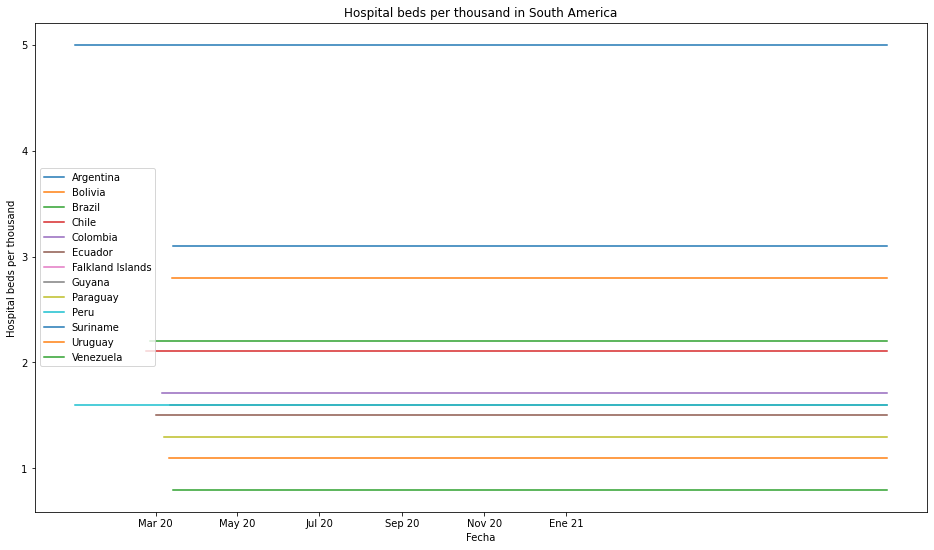

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
for pais in Sudamerica.index.drop_duplicates():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'hospital_beds_per_thousand'],label=Sudamerica['location'].drop_duplicates().loc[pais])
plt.legend()
plt.ylabel('Hospital beds per thousand')
plt.xlabel('Fecha')
plt.title('Hospital beds per thousand in South America')
#plt.yticks([0, 2000000, 4000000, 6000000, 8000000,10000000],['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
MuertesYCamasSudamerica=Sudamerica[['hospital_beds_per_thousand','total_deaths_per_million']]

In [ ]:
Correlaciones=Sudamerica[['hospital_beds_per_thousand','total_deaths_per_million','total_deaths','total_cases_per_million','total_cases']].loc['COL'].corr()

In [ ]:
Sudamerica['total_cases_per_million']

iso_code
ARG         NaN
ARG         NaN
ARG         NaN
ARG         NaN
ARG         NaN
         ...   
VEN    129643.0
VEN    130116.0
VEN    130596.0
VEN    131096.0
VEN    131476.0
Name: total_cases, Length: 4160, dtype: float64

In [ ]:
Sudamerica.index.drop_duplicates()

Index(['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR',
       'URY', 'VEN'],
      dtype='object', name='iso_code')

In [ ]:
Correlaciones=MuertesYCamasSudamerica.corr()

In [ ]:
Todos=BaseDatos[BaseDatos['date']==max(BaseDatos['date'])]

In [ ]:
CorrelacionesTodos=Todos[['hospital_beds_per_thousand','total_deaths_per_million','total_cases_per_million']].corr()

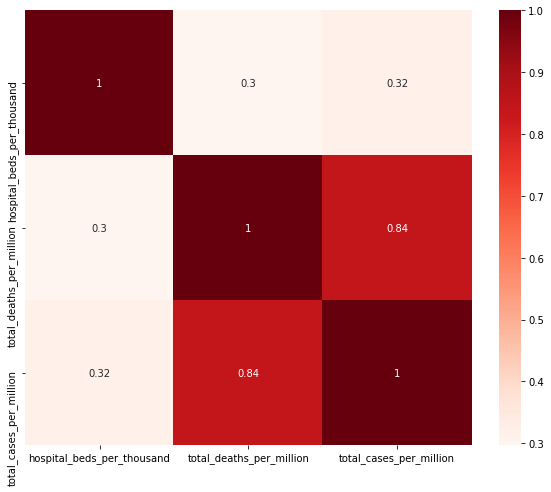

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data=CorrelacionesTodos, annot=True,cmap=plt.cm.Reds)
plt.show()

In [ ]:
Todos.drop(['OWID_WRL'],axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Todos.iloc[np.argmax(Todos['hospital_beds_per_thousand'])].dropna()

continent                              Europe
location                               Monaco
date                               2021-02-10
total_cases                              1717
new_cases                                  22
new_cases_smoothed                     20.714
total_deaths                               19
new_deaths                                  0
new_deaths_smoothed                     0.143
total_cases_per_million               43751.9
new_cases_per_million                 560.595
new_cases_smoothed_per_million        527.833
total_deaths_per_million               484.15
new_deaths_per_million                      0
new_deaths_smoothed_per_million          3.64
population                              39244
population_density                    19347.5
diabetes_prevalence                      5.46
hospital_beds_per_thousand               13.8
life_expectancy                         86.75
Name: MCO, dtype: object

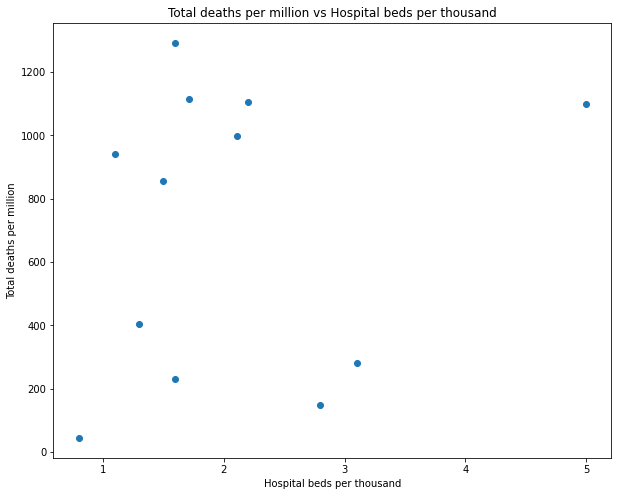

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(SouthAmerica['hospital_beds_per_thousand'],SouthAmerica['total_deaths_per_million'])
plt.xlabel('Hospital beds per thousand')
plt.ylabel('Total deaths per million')
plt.title('Total deaths per million vs Hospital beds per thousand')
plt.show()

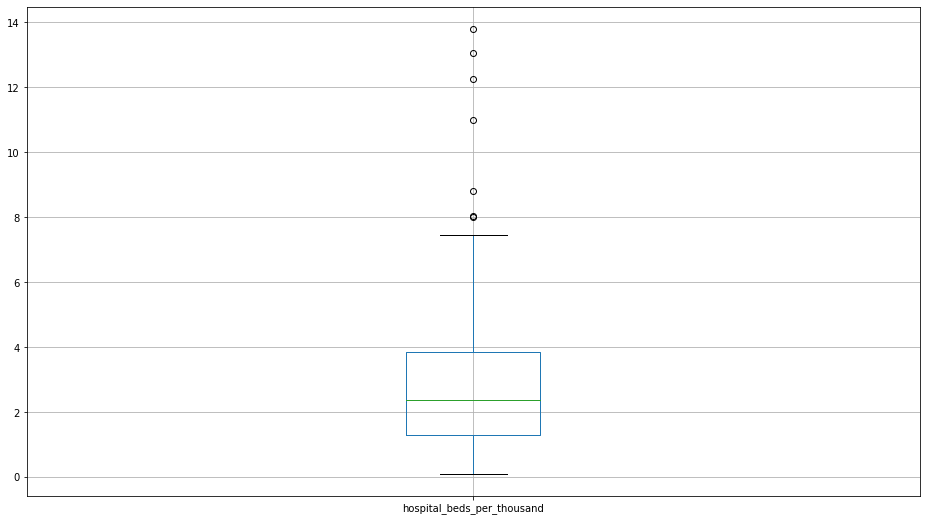

In [ ]:
Todos[['hospital_beds_per_thousand']].boxplot()

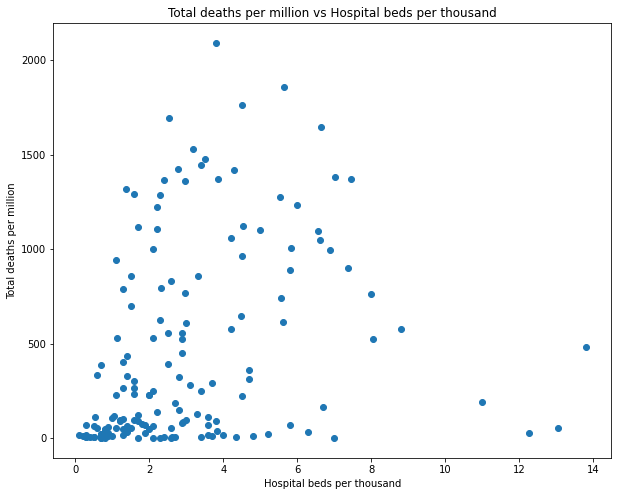

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(Todos['hospital_beds_per_thousand'],Todos['total_deaths_per_million'])
plt.xlabel('Hospital beds per thousand')
plt.ylabel('Total deaths per million')
plt.title('Total deaths per million vs Hospital beds per thousand')
plt.show()

In [ ]:
SouthAmerica=BaseDatos[np.logical_and(BaseDatos['continent']=='South America',BaseDatos['date']==max(BaseDatos['date']))]

In [ ]:
Correlaciones=SouthAmerica[['hospital_beds_per_thousand','total_deaths_per_million','total_cases_per_million']].corr()

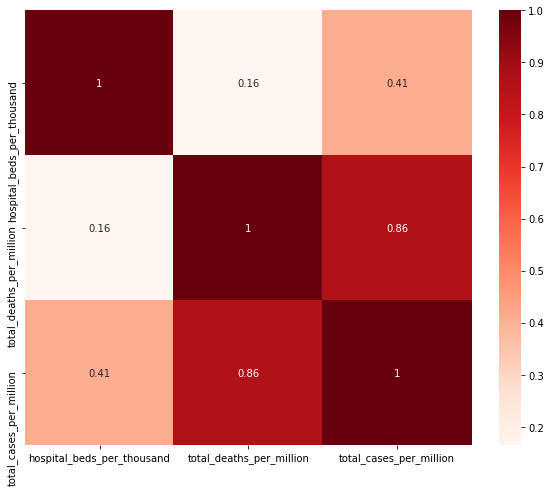

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data=Correlaciones, annot=True,cmap=plt.cm.Reds)
plt.show()

In [ ]:
Sudamerica['hospital_beds_per_thousand']['COL'].mean()

1.7099999999999969

In [ ]:
Sudamerica['hospital_beds_per_thousand']

iso_code
ARG    5.0
ARG    5.0
ARG    5.0
ARG    5.0
ARG    5.0
      ... 
VEN    0.8
VEN    0.8
VEN    0.8
VEN    0.8
VEN    0.8
Name: hospital_beds_per_thousand, Length: 4160, dtype: float64

In [ ]:
BaseDatos[BaseDatos.loc[:,'new_cases']==max(BaseDatos.loc['COL','new_cases'])]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COL,South America,Colombia,2021-01-15,1870179.0,21078.0,16373.0,47868.0,377.0,348.143,36754.579,414.245,321.778,940.749,7.409,6.842,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86722.0,8974305.0,176.372,1.704,64303.0,1.264,0.289,3.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13641


In [ ]:
BaseDatos.loc['COL']

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COL,South America,Colombia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,0.020,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13326
COL,South America,Colombia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,0.020,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13327
COL,South America,Colombia,2020-03-08,1.0,0.0,NaN,NaN,NaN,NaN,0.020,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13328
COL,South America,Colombia,2020-03-09,1.0,0.0,NaN,NaN,NaN,NaN,0.020,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.81,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13329
COL,South America,Colombia,2020-03-10,3.0,2.0,NaN,NaN,NaN,NaN,0.059,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.81,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL,South America,Colombia,2021-02-06,2151207.0,8547.0,9200.143,55693.0,290.0,291.857,42277.615,167.974,180.810,1094.533,5.699,5.736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54764.0,10430575.0,204.992,1.076,61403.0,1.207,0.151,6.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13663
COL,South America,Colombia,2021-02-07,2157216.0,6009.0,8904.571,55993.0,300.0,287.143,42395.710,118.095,175.001,1100.429,5.896,5.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37903.0,10468478.0,205.737,0.745,58712.0,1.154,0.147,6.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13664
COL,South America,Colombia,2021-02-08,2161462.0,4246.0,8136.571,56290.0,297.0,288.286,42479.157,83.447,159.908,1106.266,5.837,5.666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50732.0,10519210.0,206.734,0.997,57706.0,1.134,0.141,7.1,tests performed,Na

In [ ]:
print(BaseDatos[['location','median_age']])

             location  median_age
iso_code                         
AFG       Afghanistan        18.6
AFG       Afghanistan        18.6
AFG       Afghanistan        18.6
AFG       Afghanistan        18.6
AFG       Afghanistan        18.6
...               ...         ...
ZWE          Zimbabwe        19.6
ZWE          Zimbabwe        19.6
ZWE          Zimbabwe        19.6
ZWE          Zimbabwe        19.6
ZWE          Zimbabwe        19.6

[68106 rows x 2 columns]


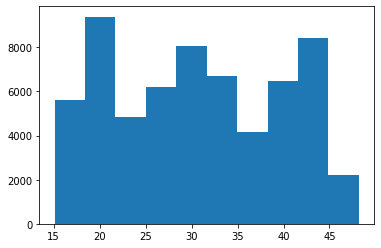

In [ ]:
import matplotlib.pyplot as plt

plt.hist(BaseDatos['median_age'])
plt.show()

In [ ]:
print(BaseDatos[0:11])

         continent     location  ... human_development_index  orden
iso_code                         ...                               
AFG           Asia  Afghanistan  ...                   0.511      0
AFG           Asia  Afghanistan  ...                   0.511      1
AFG           Asia  Afghanistan  ...                   0.511      2
AFG           Asia  Afghanistan  ...                   0.511      3
AFG           Asia  Afghanistan  ...                   0.511      4
AFG           Asia  Afghanistan  ...                   0.511      5
AFG           Asia  Afghanistan  ...                   0.511      6
AFG           Asia  Afghanistan  ...                   0.511      7
AFG           Asia  Afghanistan  ...                   0.511      8
AFG           Asia  Afghanistan  ...                   0.511      9
AFG           Asia  Afghanistan  ...                   0.511     10

[11 rows x 59 columns]


In [ ]:
BaseDatos[['location','continent','life_expectancy']]

,location,continent,life_expectancy
iso_code,,,
AFG,Afghanistan,Asia,64.83
AFG,Afghanistan,Asia,64.83
AFG,Afghanistan,Asia,64.83
AFG,Afghanistan,Asia,64.83
AFG,Afghanistan,Asia,64.83
...,...,...,...
ZWE,Zimbabwe,Africa,61.49
ZWE,Zimbabwe,Africa,61.49
ZWE,Zimbabwe,Africa,61.49


In [ ]:
BaseDatos[['new_deaths']]

,new_deaths
iso_code,
AFG,NaN
AFG,NaN
AFG,NaN
AFG,NaN
AFG,NaN
...,...
ZWE,13.0
ZWE,10.0
ZWE,13.0


In [ ]:
BaseDatos[BaseDatos['location']=='Chile']

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,0.105,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12586
CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,0.105,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12587
CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,0.105,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12588
CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,0.105,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12589
CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,0.105,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHL,South America,Chile,2021-02-06,748082.0,4063.0,3597.429,18895.0,87.0,79.429,39133.387,212.542,188.187,988.428,4.551,4.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59950.0,8333834.0,435.956,3.136,52166.0,2.729,NaN,NaN,tests performed,605644.0,592475.0,13169.0,35758.0,76932.0,3.17,3.10,0.07,4024.0,79.17,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12935
CHL,South America,Chile,2021-02-07,751886.0,3804.0,3539.571,18974.0,79.0,74.571,39332.380,198.993,185.161,992.561,4.133,3.901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54943.0,8388777.0,438.831,2.874,51381.0,2.688,NaN,NaN,tests performed,616757.0,603588.0,13169.0,11113.0,78030.0,3.23,3.16,0.07,4082.0,79.17,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12936
CHL,South America,Chile,2021-02-08,755350.0,3464.0,3494.571,19056.0,82.0,74.143,39513.588,181.207,182.807,996.850,4.290,3.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50505.0,8439282.0,441.473,2.642,50209.0,2.627,NaN,NaN,tests perfo

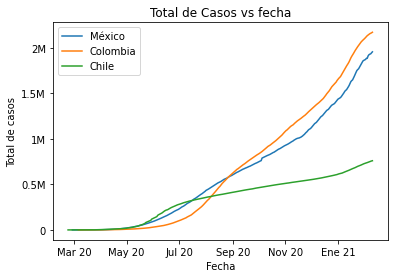

In [ ]:
plt.plot(BaseDatos.loc[['MEX'],'date'],BaseDatos.loc['MEX','total_cases'],label='México')
plt.plot(BaseDatos.loc[['COL'],'date'],BaseDatos.loc[['COL'],'total_cases'],label='Colombia')
plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','total_cases'],label='Chile')
plt.legend()
plt.ylabel('Total de casos')
plt.xlabel('Fecha')
plt.title('Total de Casos vs fecha')
plt.yticks([0, 500000, 1000000, 1500000, 2000000],['0', '0.5M', '1M', '1.5M', '2M'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.savefig("Total casos Mexico-Colombia-Chile")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

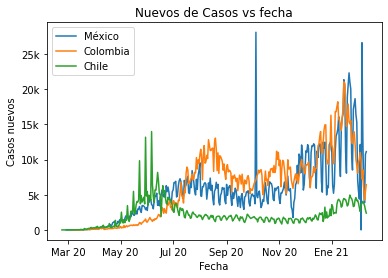

In [ ]:
plt.plot(BaseDatos.loc['MEX','date'],BaseDatos.loc['MEX','new_cases'],label='México')
plt.plot(BaseDatos.loc['COL','date'],BaseDatos.loc['COL','new_cases'],label='Colombia')
plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','new_cases'],label='Chile')
plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos vs fecha')
plt.yticks([0, 5000, 10000, 15000, 20000,25000],['0', '5k', '10k', '15k', '20k','25k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

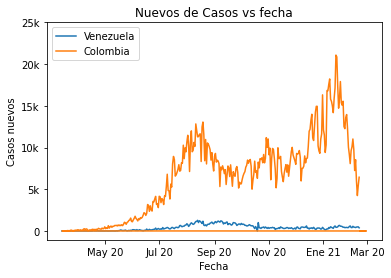

In [ ]:
plt.plot(BaseDatos.loc['VEN','date'],BaseDatos.loc['VEN','new_cases'],label='Venezuela')
plt.plot(BaseDatos.loc['COL','date'],BaseDatos.loc['COL','new_cases'],label='Colombia')

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos vs fecha')
plt.yticks([0, 5000, 10000, 15000, 20000,25000],['0', '5k', '10k', '15k', '20k','25k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
print(BaseDatos.loc[['MEX'],['date','new_cases']])
print(BaseDatos.loc[['COL'],['date','new_cases']])

                date  new_cases
iso_code                       
MEX       2020-01-01        NaN
MEX       2020-01-02        NaN
MEX       2020-01-03        NaN
MEX       2020-01-04        NaN
MEX       2020-01-05        NaN
...              ...        ...
MEX       2021-02-06    13209.0
MEX       2021-02-07     6065.0
MEX       2021-02-08     3868.0
MEX       2021-02-09    10738.0
MEX       2021-02-10    11138.0

[407 rows x 2 columns]
                date  new_cases
iso_code                       
COL       2020-03-06        1.0
COL       2020-03-07        0.0
COL       2020-03-08        0.0
COL       2020-03-09        0.0
COL       2020-03-10        2.0
...              ...        ...
COL       2021-02-06     8547.0
COL       2021-02-07     6009.0
COL       2021-02-08     4246.0
COL       2021-02-09     5442.0
COL       2021-02-10     6443.0

[342 rows x 2 columns]


In [ ]:
Ultimodia=BaseDatos.loc[:,'date']==max(BaseDatos.loc[:,'date'])

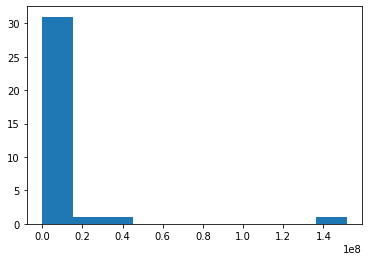

In [ ]:
plt.hist(BaseDatos.loc[Ultimodia,'total_vaccinations'])
plt.show()

In [ ]:
ConVacunar= BaseDatos.loc[Ultimodia,'total_vaccinations']>1

In [ ]:
import numpy as np

SinVacunar=np.logical_not(ConVacunar)

In [ ]:
sum(SinVacunar)

168

In [ ]:
ConVacunar

iso_code
AFG         False
NaN         False
ALB         False
DZA         False
AND         False
            ...  
VNM         False
OWID_WRL     True
YEM         False
ZMB         False
ZWE         False
Name: total_vaccinations, Length: 202, dtype: bool

In [ ]:
sum(Ultimodia)

202

In [ ]:
BaseDatos[Ultimodia]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2021-02-10,55402.0,18.0,32.571,2418.0,4.0,1.714,1423.179,0.462,0.837,62.114,0.103,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,352
NaN,NaN,Africa,2021-02-10,3706143.0,13118.0,13361.714,96770.0,536.0,528.143,2764.544,9.785,9.967,72.184,0.400,0.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716
ALB,Europe,Albania,2021-02-10,88671.0,1143.0,1104.286,1503.0,15.0,14.143,30812.079,397.178,383.726,522.274,5.212,4.914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,1068
DZA,Africa,Algeria,2021-02-10,109782.0,223.0,238.000,2926.0,2.0,3.714,2503.521,5.085,5.427,66.726,0.046,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,1420
AND,Europe,Andorra,2021-02-10,10352.0,40.0,40.286,106.0,0.0,0.429,133980.457,517.699,521.397,1371.902,0.000,5.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,1766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,Asia,Vietnam,2021-02-10,2091.0,27.0,20.429,35.0,0.0,0.000,21.482,0.277,0.210,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,66754
OWID_WRL,NaN,World,2021-02-10,107340682.0,435081.0,421259.143,2354561.0,13457.0,12063.857,13770.809,55.817,54.044,302.068,1.726,1.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151486801.0,73196940.0,20195567.0,3406172.0,5093082.0,1.94,0.94,0.26,653.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,67140
YEM,Asia,Yemen,2021-02-10,2133.0,2.0,1.571,616.0,1.0,0.143,71.515,0.067,0.053,20.653,0.034,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+

In [ ]:
BaseDatos.loc['COL',['date','total_cases']]

,date,total_cases
iso_code,,
COL,2020-03-06,1.0
COL,2020-03-07,1.0
COL,2020-03-08,1.0
COL,2020-03-09,1.0
COL,2020-03-10,3.0
...,...,...
COL,2021-02-06,2151207.0
COL,2021-02-07,2157216.0
COL,2021-02-08,2161462.0


###Análisis South America###

In [ ]:
BaseDatos[np.logical_and(BaseDatos['continent']=='South America',BaseDatos['date']==max(BaseDatos['date']))]

In [ ]:
BaseDatos['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
SouthAmerica=BaseDatos[BaseDatos['continent']=='South America']

In [ ]:
SouthAmerica.index.unique()

Index(['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'FLK', 'GUY', 'PRY', 'PER',
       'SUR', 'URY', 'VEN'],
      dtype='object', name='iso_code')

In [ ]:
print(max(SouthAmerica.count(0)))

12


In [ ]:
BaseDatos.index

Index(['AFG', 'AFG', 'AFG', 'AFG', 'AFG', 'AFG', 'AFG', 'AFG', 'AFG', 'AFG',
       ...
       'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE'],
      dtype='object', name='iso_code', length=68106)

In [ ]:
SouthAmerica

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARG,South America,Argentina,2021-02-10,2001034.0,7739.0,6898.571,49674.0,108.0,162.143,44274.800,171.233,152.638,1099.085,2.390,3.588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535303.0,337772.0,197531.0,22125.0,19820.0,1.18,0.75,0.44,439.0,NaN,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,2836
BOL,South America,Bolivia,2021-02-10,232502.0,1771.0,1436.429,10996.0,67.0,60.714,19917.881,151.717,123.055,942.001,5.740,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,11673029.0,10.202,25.4,6.704,4.393,6885.829,7.1,204.299,6.89,NaN,NaN,25.383,1.10,71.51,0.718,8097
BRA,South America,Brazil,2021-02-10,9659167.0,59602.0,45678.143,234850.0,1330.0,1041.000,45442.199,280.402,214.896,1104.868,6.257,4.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4120332.0,4069677.0,50655.0,300125.0,228375.0,1.94,1.91,0.02,1074.0,NaN,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,9109
CHL,South America,Chile,2021-02-10,760576.0,2387.0,3418.714,19105.0,21.0,75.571,39786.968,124.868,178.839,999.414,1.099,3.953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28742.0,8507048.0,445.018,1.504,48765.0,2.551,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,12939
COL,South America,Colombia,2021-02-10,2173347.0,6443.0,6817.857,56733.0,226.0,265.143,42712.732,126.624,133.991,1114.972,4.442,5.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53330.0,10620148.0,208.717,1.048,54463.0,1.070,0.133,7.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50882884.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,13667
ECU,South America,Ecuador,2021-02-10,260076.0,293.0,1098.000,15116.0,30.0,23.857,14740.980,16.607,62.234,856.767,1.700,1.352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.44,17643060.0,66.939,28.1,7.104,4.458,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.50,77.01,0.759,18406
GUY,South America,Guyana,2021-02-10,8092.0,51.0,54.000,182.0,1.0,0.714,10287.849,64.839,68.653,231.388,1.271,0.908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786559.0,3.952,26.3,5.305,2.837,7435.047,NaN,373.159,11.62,NaN,NaN,77.159,1.60,69.91,0.682,26526
PRY,South America,Paraguay,2021-02-10,140797.0,978.0,795.429,2876.0,14.0,15.857,19740.120,137.118,111.521,403.223,1.963,2.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7132530.0,17.144,26.5,

In [ ]:
#for i in range(0,max(SouthAmerica.count(0))+1):
 # print()
for i in SouthAmerica.index:
  print(i)

ARG
BOL
BRA
CHL
COL
ECU
GUY
PRY
PER
SUR
URY
VEN


In [ ]:
for i in SouthAmerica.index.unique():
  print(i)

ARG
BOL
BRA
CHL
COL
ECU
FLK
GUY
PRY
PER
SUR
URY
VEN


In [ ]:
BaseDatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89029 entries, AFG to ZWE
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   continent                              84281 non-null  object 
 1   location                               89029 non-null  object 
 2   date                                   89029 non-null  object 
 3   total_cases                            85659 non-null  float64
 4   new_cases                              85657 non-null  float64
 5   new_cases_smoothed                     84656 non-null  float64
 6   total_deaths                           75896 non-null  float64
 7   new_deaths                             76054 non-null  float64
 8   new_deaths_smoothed                    84656 non-null  float64
 9   total_cases_per_million                85197 non-null  float64
 10  new_cases_per_million                  85195 non-null  float64
 11  new_cas

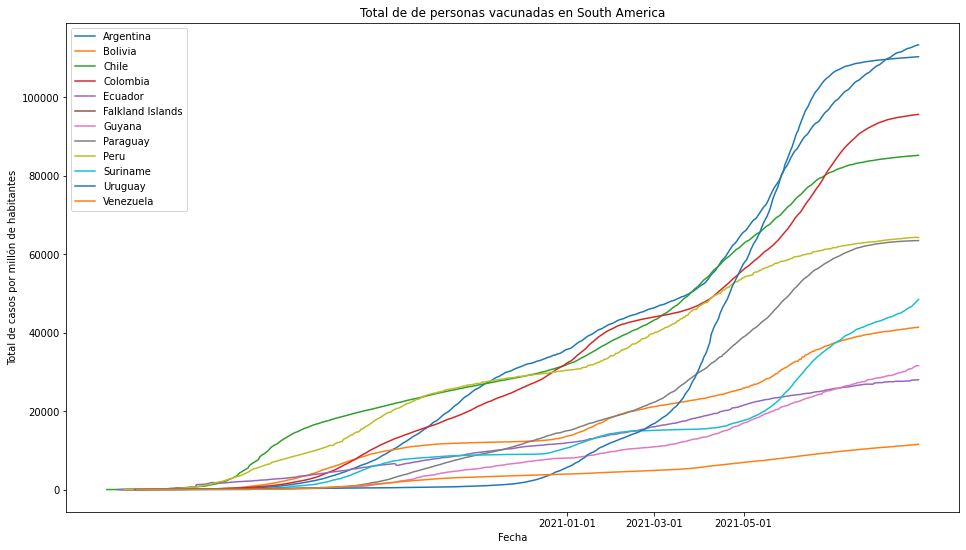

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'total_cases_per_million'],label=SouthAmerica.loc[pais,'location'][0])
plt.legend()
plt.ylabel('Total de casos por millón de habitantes')
plt.xlabel('Fecha')
plt.title('Total de de personas vacunadas en South America')
#plt.yticks([0, 2000000, 4000000, 6000000, 8000000,10000000],['0', '2M', '4M', '6M', '8M', '10M'])
#plt.xticks(['2021-01-01','2021-03-01','2021-05-01'])
plt.savefig('Total de casos por millón en South America.png')
plt.show()

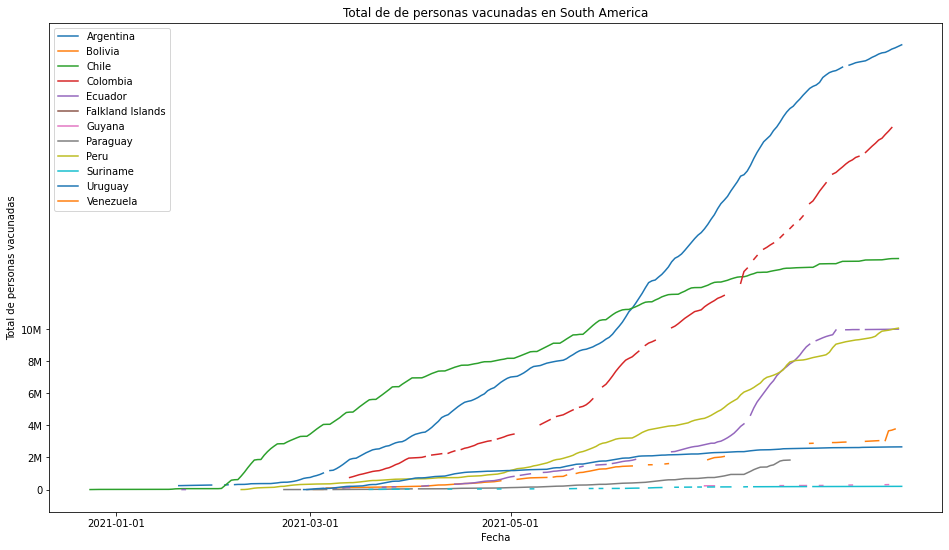

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'people_vaccinated'],label=SouthAmerica.loc[pais,'location'][0])
plt.legend()
plt.ylabel('Total de personas vacunadas')
plt.xlabel('Fecha')
plt.title('Total de de personas vacunadas en South America')
plt.yticks([0, 2000000, 4000000, 6000000, 8000000,10000000],['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(['2021-01-01','2021-03-01','2021-05-01'])
plt.savefig('Total de de personas vacunadas en South America.png')
plt.show()

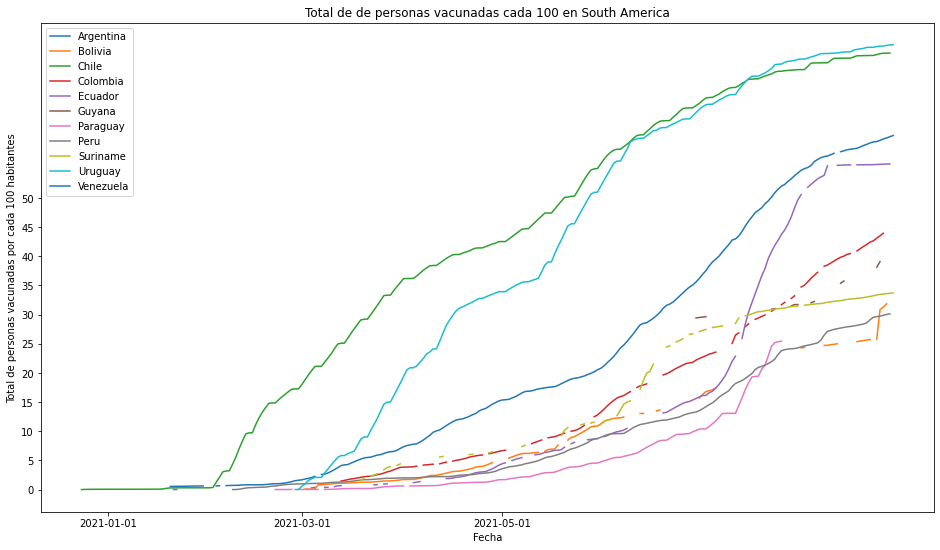

In [ ]:
for pais in SouthAmerica.drop(['BRA','FLK'],axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'people_vaccinated_per_hundred'],label=SouthAmerica.loc[pais,'location'][0])
plt.legend()
plt.ylabel('Total de personas vacunadas por cada 100 habitantes')
plt.xlabel('Fecha')
plt.title('Total de de personas vacunadas cada 100 en South America')
plt.yticks(range(0,51,5))
plt.xticks(['2021-01-01','2021-03-01','2021-05-01'])#,['Ene 21','Mar 21','May 21'])
plt.savefig('Total de de personas vacunadas cada 100 en South America.png')
plt.show()

In [ ]:
not True

False

In [ ]:
BaseDatos.loc['COL','people_vaccinated_per_hundred'].notna()

iso_code
COL    False
COL    False
COL    False
COL    False
COL    False
       ...  
COL     True
COL     True
COL    False
COL    False
COL    False
Name: people_vaccinated_per_hundred, Length: 541, dtype: bool

In [ ]:
Datos.notna

<bound method Series.notna of iso_code
COL     True
COL     True
COL     True
COL     True
COL     True
       ...  
COL    False
COL    False
COL     True
COL     True
COL     True
Name: people_vaccinated_per_hundred, Length: 541, dtype: bool>

In [ ]:
maxCol=max(BaseDatos.loc['COL','people_vaccinated_per_hundred'][BaseDatos.loc['COL','people_vaccinated_per_hundred'].notna()])

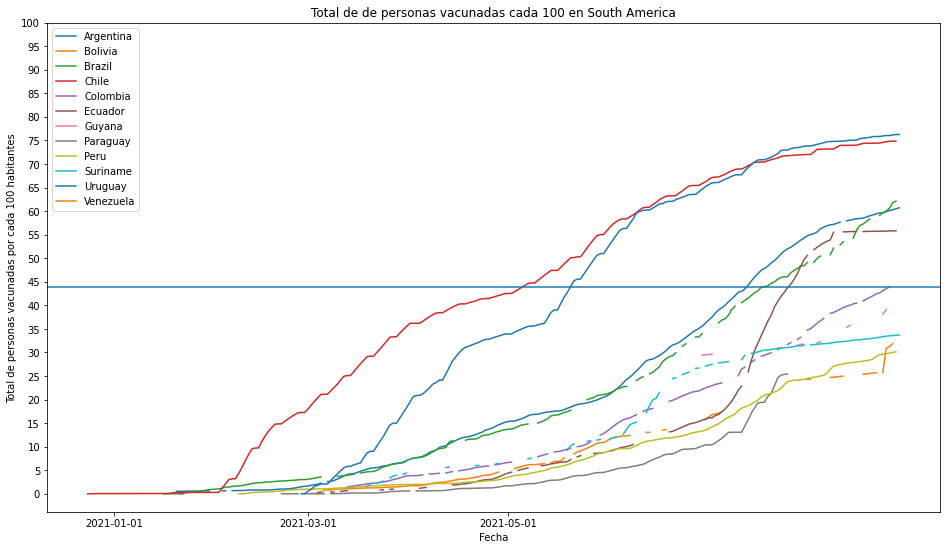

In [ ]:
for pais in SouthAmerica.drop(['FLK'],axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'people_vaccinated_per_hundred'],label=SouthAmerica.loc[pais,'location'][0])
plt.legend()
plt.ylabel('Total de personas vacunadas por cada 100 habitantes')
plt.xlabel('Fecha')
plt.axhline(y=maxCol,)
plt.title('Total de de personas vacunadas cada 100 en South America')
plt.yticks(range(0,101,5))
plt.xticks(['2021-01-01','2021-03-01','2021-05-01'])#,['Ene 21','Mar 21','May 21'])
plt.savefig('Total de de personas vacunadas cada 100 en South America.png')
plt.show()

In [ ]:
SouthAmerica['people_vaccinated_per_hundred'].argmax()

2756

In [ ]:
SouthAmerica.loc['FLK']

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FLK,South America,Falkland Islands,2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
FLK,South America,Falkland Islands,2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,NaN,NaN,NaN,54264.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
FLK,South America,Falkland Islands,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,NaN,NaN,NaN,54264.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
FLK,South America,Falkland Islands,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,NaN,NaN,NaN,54264.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
FLK,South America,Falkland Islands,2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,NaN,NaN,NaN,54264.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLK,South America,Falkland Islands,2021-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,NaN,NaN,30721.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
FLK,South America,Falkland Islands,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,23830.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
FLK,South America,Falkland Islands,2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,17227.0,NaN,3483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN


In [ ]:
SouthAmerica.iloc[2756]

continent                                   South America
location                                 Falkland Islands
date                                           2021-04-14
total_cases                                           NaN
new_cases                                             NaN
new_cases_smoothed                                    NaN
total_deaths                                          NaN
new_deaths                                            NaN
new_deaths_smoothed                                   NaN
total_cases_per_million                               NaN
new_cases_per_million                                 NaN
new_cases_smoothed_per_million                        NaN
total_deaths_per_million                              NaN
new_deaths_per_million                                NaN
new_deaths_smoothed_per_million                       NaN
reproduction_rate                                     NaN
icu_patients                                          NaN
icu_patients_p

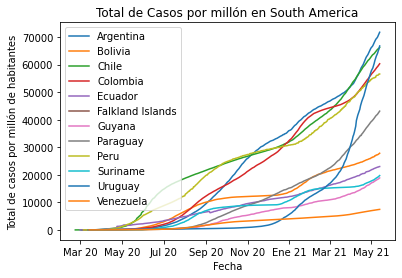

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'total_cases_per_million'],label=SouthAmerica.loc[pais,'location'][0])
plt.legend()
plt.ylabel('Total de casos por millón de habitantes')
plt.xlabel('Fecha')
plt.title('Total de Casos por millón en South America')
#plt.yticks([0, 2000000, 4000000, 6000000, 8000000,10000000],['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01','2021-03-01','2021-05-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21','Mar 21','May 21'])
plt.savefig('Total de Casos por millón en South America.png')
plt.show()

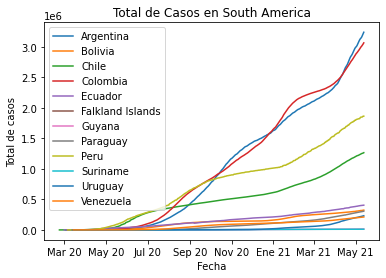

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'total_cases'],label=SouthAmerica.loc[pais,'location'][0])
plt.legend()
plt.ylabel('Total de casos')
plt.xlabel('Fecha')
plt.title('Total de Casos en South America')
#plt.yticks([0, 2000000, 4000000, 6000000, 8000000,10000000],['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01','2021-03-01','2021-05-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21','Mar 21','May 21'])
plt.show()

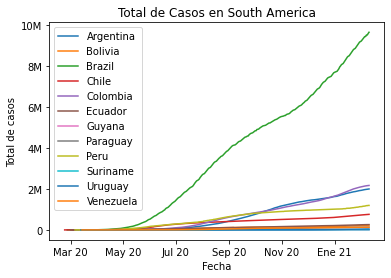

In [ ]:
for pais in SouthAmerica.index:
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'total_cases'],label=SouthAmerica.loc[pais,'location'])
plt.legend()
plt.ylabel('Total de casos')
plt.xlabel('Fecha')
plt.title('Total de Casos en South America')
plt.yticks([0, 2000000, 4000000, 6000000, 8000000,10000000],['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

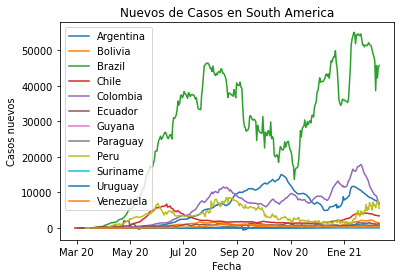

In [ ]:
for pais in SouthAmerica.index:
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'new_cases_smoothed'],label=SouthAmerica.loc[pais,'location'])

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
SouthAmerica['location'].loc[pais][0]

'Venezuela'

In [ ]:
max(SouthAmerica['date'])

'2021-05-13'

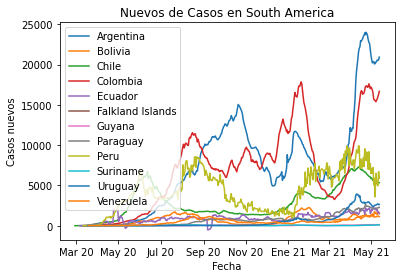

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'new_cases_smoothed'],label=SouthAmerica['location'].loc[pais][0])

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01','2021-03-01','2021-05-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21','Mar 21','May 21'])
plt.savefig('Nuevos de Casos en South America.png')
plt.show()

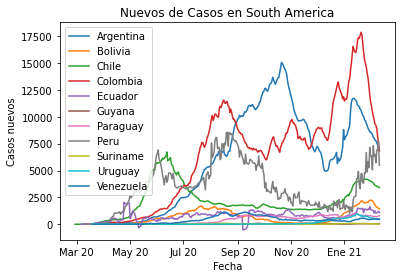

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index:
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'new_cases_smoothed'],label=SouthAmerica.loc[pais,'location'])

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

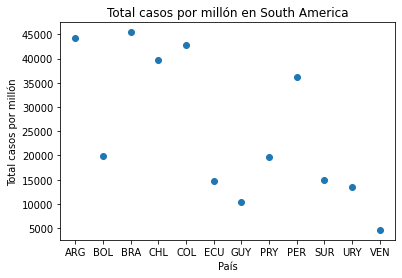

In [ ]:
plt.scatter(SouthAmerica.index,BaseDatos[Ultimodia].loc[SouthAmerica.index,'total_cases_per_million'])
plt.ylabel('Total casos por millón')
plt.xlabel('País')
plt.title('Total casos por millón en South America')
plt.show()

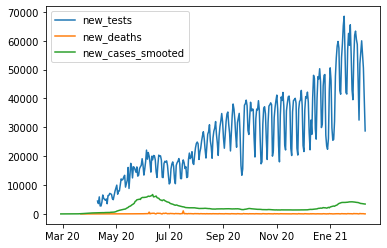

In [ ]:
plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','new_tests'],label='new_tests')
plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','new_deaths'],label='new_deaths')
plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','new_cases_smoothed'],label='new_cases_smooted')
#plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','total_vaccinations'],label='total_vaccinations')
plt.legend()
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
SouthAmerica.loc[:,['total_vaccinations']].dropna(how='any')

,total_vaccinations
iso_code,
ARG,535303.0
BRA,4120332.0
PER,9779.0


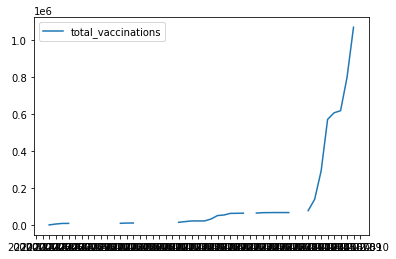

In [ ]:
plt.plot(BaseDatos.loc['CHL','date'],BaseDatos.loc['CHL','total_vaccinations'],label='total_vaccinations')
plt.legend()
#plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

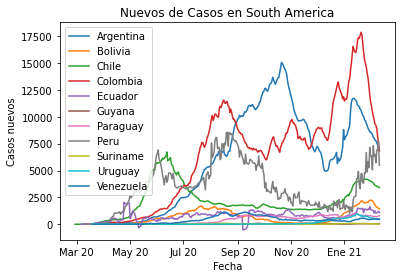

In [ ]:
for pais in SouthAmerica.drop('BRA',axis=0).index:
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'new_cases_smoothed'],label=SouthAmerica.loc[pais,'location'])

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
SouthAmerica

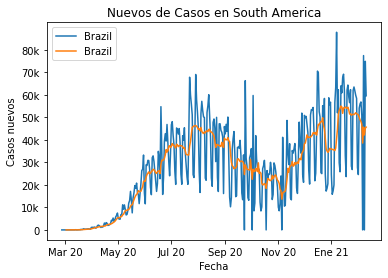

In [ ]:
plt.plot(BaseDatos.loc['BRA','date'],BaseDatos.loc['BRA','new_cases'],label=SouthAmerica.loc['BRA','location'])
plt.plot(BaseDatos.loc['BRA','date'],BaseDatos.loc['BRA','new_cases_smoothed'],label=SouthAmerica.loc['BRA','location'])

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

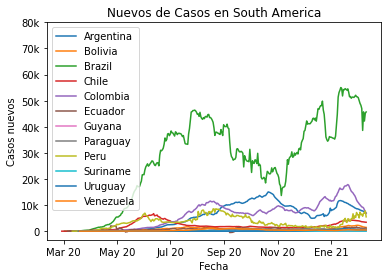

In [ ]:
for pais in SouthAmerica.index:
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'new_cases_smoothed'],label=SouthAmerica.loc[pais,'location'])

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
NoVacio=np.logical_not(BaseDatos.loc['ARG','new_cases'].isnull())

In [ ]:
BaseDatos.loc['ARG','new_cases'].isnull().sum().sum()

62

In [ ]:
BaseDatosSinNull=BaseDatos.loc[:,'new_cases'].dropna(how='any')
BaseDatosSinNull

iso_code
AFG      1.0
AFG      0.0
AFG      0.0
AFG      0.0
AFG      0.0
       ...  
ZWE    156.0
ZWE     65.0
ZWE    106.0
ZWE    123.0
ZWE     83.0
Name: new_cases, Length: 67349, dtype: float64

In [ ]:
for pais in SouthAmerica.index:
  print(pais,'Mínimo',min(BaseDatosSinNull.loc[pais]),'máximo',max(BaseDatosSinNull.loc[pais]))

ARG Mínimo 0.0 máximo 18326.0
BOL Mínimo 0.0 máximo 2866.0
BRA Mínimo 0.0 máximo 87843.0
CHL Mínimo 0.0 máximo 13990.0
COL Mínimo 0.0 máximo 21078.0
ECU Mínimo -7953.0 máximo 11536.0
GUY Mínimo -15.0 máximo 133.0
PRY Mínimo 0.0 máximo 1268.0
PER Mínimo 0.0 máximo 21358.0
SUR Mínimo 0.0 máximo 139.0
URY Mínimo -21.0 máximo 1514.0
VEN Mínimo 0.0 máximo 1281.0


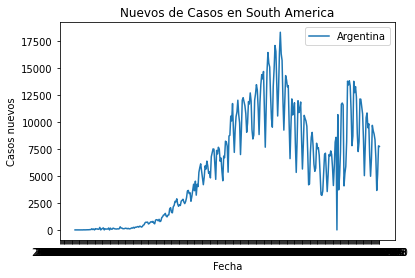

In [ ]:
plt.plot(BaseDatos.loc['ARG','date'],BaseDatos.loc['ARG','new_cases'],label='Argentina')

plt.legend()
plt.ylabel('Casos nuevos')
plt.xlabel('Fecha')
plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.show()

In [ ]:
BaseDatos[['male_smokers','female_smokers','total_deaths']].loc[Ultimodia]

,male_smokers,female_smokers,total_deaths
iso_code,,,
AFG,NaN,NaN,2418.0
NaN,NaN,NaN,96770.0
ALB,51.200,7.100,1503.0
DZA,30.400,0.700,2926.0
AND,37.800,29.000,106.0
...,...,...,...
VNM,45.900,1.000,35.0
OWID_WRL,34.635,6.434,2354561.0
YEM,29.200,7.600,616.0


In [ ]:
BaseDatos[BaseDatos['total_deaths']==max(BaseDatos['total_deaths'].loc[Ultimodia])]
#BaseDatos['total_deaths']==max(BaseDatos['total_deaths'].loc[Ultimodia])

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden,total_smokers
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,NaN,World,2021-02-10,107340682.0,435081.0,421259.143,2354561.0,13457.0,12063.857,13770.809,55.817,54.044,302.068,1.726,1.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151486801.0,73196940.0,20195567.0,3406172.0,5093082.0,1.94,0.94,0.26,653.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,67140,20.5345


In [ ]:
DatosMundiales=BaseDatos.loc['OWID_WRL']
DatosMundiales

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,orden,total_smokers
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.071,0.000,NaN,0.002,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,66755,20.5345
OWID_WRL,NaN,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,0.084,0.013,NaN,0.002,0.000,NaN,3.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,66756,20.5345
OWID_WRL,NaN,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,0.121,0.037,NaN,0.003,0.001,NaN,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,66757,20.5345
OWID_WRL,NaN,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,0.184,0.063,NaN,0.005,0.002,NaN,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,66758,20.5345
OWID_WRL,NaN,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,0.272,0.088,NaN,0.007,0.002,NaN,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,66759,20.5345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_WRL,NaN,World,2021-02-06,105764730.0,372153.0,454273.571,2309346.0,10111.0,12576.429,13568.629,47.744,58.279,296.268,1.297,1.613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128904472.0,66136555.0,16484007.0,4448294.0,4799735.0,1.65,0.85,0.21,616.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,67136,20.5345
OWID_WRL,NaN,World,2021-02-07,106162536.0,397806.0,456492.714,2317201.0,7855.0,12561.857,13619.664,51.035,58.564,297.275,1.008,1.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132280690.0,68100691.0,17638375.0,3376218.0,4677419.0,1.70,0.87,0.23,600.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,67137,20.5345
OWID_WRL,NaN,World,2021-02-08,106478046.0,315510.0,437864.000,2325512.0,8311.0,12291.714,13660.141,40.477,56.174,298.3

In [ ]:
BaseDatos.drop(['OWID_WRL'],axis=0)['total_deaths']

iso_code
AFG       NaN
AFG       NaN
AFG       NaN
AFG       NaN
AFG       NaN
        ...  
ZWE    1316.0
ZWE    1326.0
ZWE    1339.0
ZWE    1353.0
ZWE    1364.0
Name: total_deaths, Length: 67720, dtype: float64

In [ ]:
BaseDatos

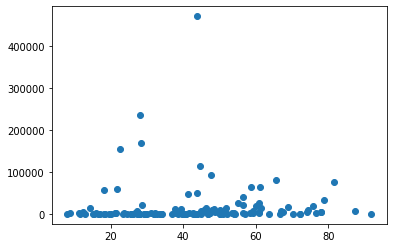

In [ ]:
plt.scatter(BaseDatos['male_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0)+BaseDatos['female_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0),BaseDatos['total_deaths'].loc[Ultimodia].drop(['OWID_WRL'],axis=0))
plt.show()

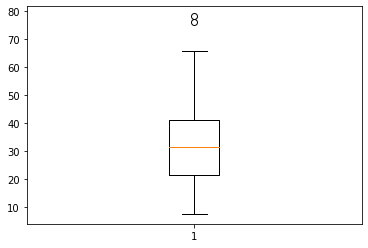

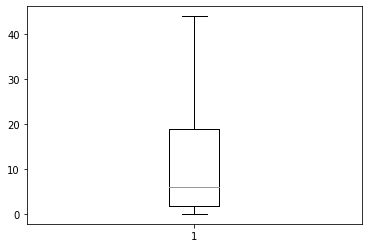

In [ ]:
plt.boxplot(BaseDatos['male_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0).dropna(how='any'))
plt.show()
plt.boxplot(BaseDatos['female_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0).dropna(how='any'))
plt.show()

In [ ]:
BaseDatos['male_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0).dropna(how='any')

iso_code
ALB    51.2
DZA    30.4
AND    37.8
ARG    27.7
ARM    52.1
       ... 
VUT    34.5
VNM    45.9
YEM    29.2
ZMB    24.7
ZWE    30.7
Name: male_smokers, Length: 140, dtype: float64

In [ ]:
BaseDatos['total_smokers']=(BaseDatos['male_smokers']+BaseDatos['female_smokers'])/2
BaseDatos[['population','total_smokers','male_smokers','female_smokers']]

,population,total_smokers,male_smokers,female_smokers
iso_code,,,,
AFG,38928341.0,NaN,NaN,NaN
AFG,38928341.0,NaN,NaN,NaN
AFG,38928341.0,NaN,NaN,NaN
AFG,38928341.0,NaN,NaN,NaN
AFG,38928341.0,NaN,NaN,NaN
...,...,...,...,...
ZWE,14862927.0,16.15,30.7,1.6
ZWE,14862927.0,16.15,30.7,1.6
ZWE,14862927.0,16.15,30.7,1.6


In [ ]:
BaseDatos.dropna(how='any')

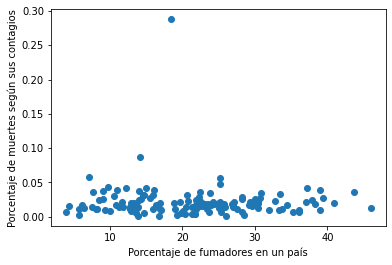

In [ ]:
plt.scatter(BaseDatos['total_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0),(BaseDatos['total_deaths']/BaseDatos['total_cases']).loc[Ultimodia].drop(['OWID_WRL'],axis=0))
plt.ylabel('Porcentaje de muertes según sus contagios')
plt.xlabel('Porcentaje de fumadores en un país')
#plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.show()

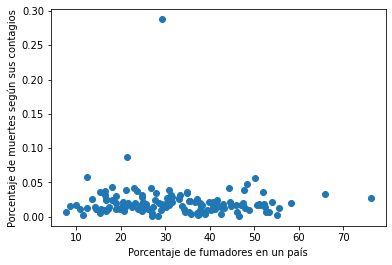

In [ ]:
plt.scatter(BaseDatos['male_smokers'].loc[Ultimodia].drop(['OWID_WRL'],axis=0),(BaseDatos['total_deaths']/BaseDatos['total_cases']).loc[Ultimodia].drop(['OWID_WRL'],axis=0))
plt.ylabel('Porcentaje de muertes según sus contagios')
plt.xlabel('Porcentaje de fumadores en un país')
#plt.title('Nuevos de Casos en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.show()

In [ ]:
#BaseDatos[Ultimodia].loc[['COL','MEX','CHL'],['population','population_density']]
#BaseDatos[Ultimodia].loc[SouthAmerica.index,['population','population_density']]
BaseDatos[Ultimodia].loc[SouthAmerica.index,['population','total_cases','total_cases_per_million','total_tests','total_tests_per_thousand','tests_per_case']]

,population,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,tests_per_case
iso_code,,,,,,
ARG,45195777.0,2001034.0,44274.800,NaN,NaN,NaN
BOL,11673029.0,232502.0,19917.881,NaN,NaN,NaN
BRA,212559409.0,9659167.0,45442.199,NaN,NaN,NaN
CHL,19116209.0,760576.0,39786.968,8507048.0,445.018,NaN
COL,50882884.0,2173347.0,42712.732,10620148.0,208.717,7.5
ECU,17643060.0,260076.0,14740.980,NaN,NaN,NaN
GUY,786559.0,8092.0,10287.849,NaN,NaN,NaN
PRY,7132530.0,140797.0,19740.120,NaN,NaN,NaN
PER,32971846.0,1196778.0,36296.967,NaN,NaN,NaN


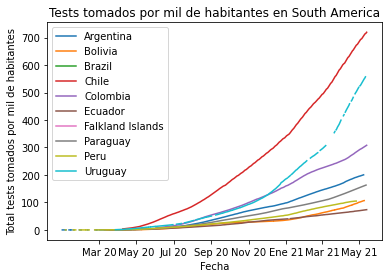

In [ ]:
for pais in SouthAmerica.drop(['GUY','SUR','VEN'],axis=0).index.unique():
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'total_tests_per_thousand'],label=SouthAmerica.loc[pais,'location'][0])

plt.legend()
plt.ylabel('Total tests tomados por mil de habitantes')
plt.xlabel('Fecha')
plt.title('Tests tomados por mil de habitantes en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01','2021-03-01','2021-05-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21','Mar 21','May 21'])
plt.savefig('Tests tomados por mil de habitantes en South America.png')
plt.show()

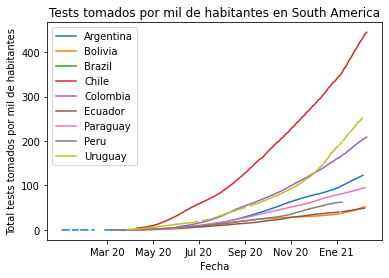

In [ ]:
for pais in SouthAmerica.drop(['GUY','SUR','VEN'],axis=0).index:
  plt.plot(BaseDatos.loc[pais,'date'],BaseDatos.loc[pais,'total_tests_per_thousand'],label=SouthAmerica.loc[pais,'location'])

plt.legend()
plt.ylabel('Total tests tomados por mil de habitantes')
plt.xlabel('Fecha')
plt.title('Tests tomados por mil de habitantes en South America')
#plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.xticks(['2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01','2021-01-01'],['Mar 20','May 20','Jul 20','Sep 20','Nov 20','Ene 21'])
plt.show()

In [ ]:
print('Total tests por mil de habitantes')
for pais in SouthAmerica.drop(['GUY','SUR','VEN'],axis=0).index:
  print(pais,round(max(BaseDatos.loc[pais,'total_tests_per_thousand'].dropna(how='any')),2))

Total tests por mil de habitantes
ARG 123.03
BOL 51.98
BRA 30.21
CHL 445.02
COL 208.72
ECU 48.81
PRY 95.25
PER 62.36
URY 261.47


In [ ]:
8507048/19116209

0.4450175241335769

In [ ]:
print('Total tests por mil de habitantes')
for pais in SouthAmerica.drop(['GUY','SUR','VEN','BRA'],axis=0).index:
  print(pais,round(max(BaseDatos.loc[pais,'tests_per_case'].dropna(how='any')),2))

Total tests por mil de habitantes
ARG 19.3
BOL 16.8
CHL 23.3
COL 7.5
ECU 5.9
PRY 128.5
PER 27.8
URY 2412.6


In [ ]:
NewBaseDatos=BaseDatos2.drop_duplicates('iso_code')

In [ ]:
NewBaseDatos=NewBaseDatos.set_index('iso_code')

In [ ]:
NewBaseDatos.loc['COL']

continent                                South America
location                                      Colombia
date                                        2020-03-06
total_cases                                          1
new_cases                                            1
new_cases_smoothed                                 NaN
total_deaths                                       NaN
new_deaths                                         NaN
new_deaths_smoothed                                NaN
total_cases_per_million                           0.02
new_cases_per_million                             0.02
new_cases_smoothed_per_million                     NaN
total_deaths_per_million                           NaN
new_deaths_per_million                             NaN
new_deaths_smoothed_per_million                    NaN
reproduction_rate                                  NaN
icu_patients                                       NaN
icu_patients_per_million                           NaN
hosp_patie

###Análisis de Colombia###

In [6]:
BaseDatosCOL=BaseDatos.loc['COL']
BaseDatosCOL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, COL to COL
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   continent                                   710 non-null    object 
 1   location                                    710 non-null    object 
 2   date                                        710 non-null    object 
 3   total_cases                                 710 non-null    float64
 4   new_cases                                   710 non-null    float64
 5   new_cases_smoothed                          705 non-null    float64
 6   total_deaths                                694 non-null    float64
 7   new_deaths                                  694 non-null    float64
 8   new_deaths_smoothed                         694 non-null    float64
 9   total_cases_per_million                     710 non-null    float64
 10  new_cases_per_mil

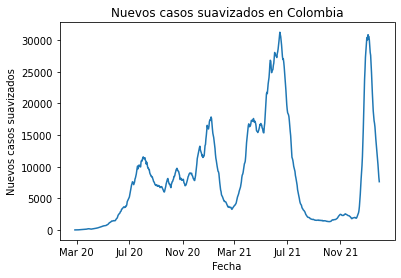

In [7]:
fig, ax= plt.subplots()
ax.plot(BaseDatosCOL['date'],BaseDatosCOL['new_cases_smoothed'])

ax.set_title('Nuevos casos suavizados en Colombia')
ax.set_ylabel('Nuevos casos suavizados')
ax.set_xlabel('Fecha')

plt.xticks(['2020-03-15','2020-07-15','2020-11-15','2021-03-15','2021-07-15','2021-11-15'],['Mar 20','Jul 20','Nov 20','Mar 21','Jul 21','Nov 21'])
fig.show()

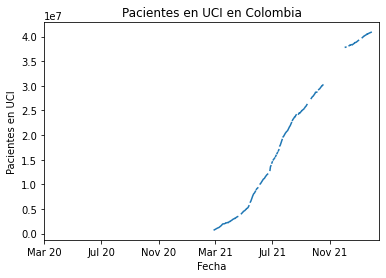

In [8]:
fig, ax= plt.subplots()
ax.plot(BaseDatosCOL['date'],BaseDatosCOL['people_vaccinated'])

ax.set_title('Pacientes en UCI en Colombia')
ax.set_ylabel('Pacientes en UCI')
ax.set_xlabel('Fecha')

plt.xticks(['2020-03-15','2020-07-15','2020-11-15','2021-03-15','2021-07-15','2021-11-15'],['Mar 20','Jul 20','Nov 20','Mar 21','Jul 21','Nov 21'])
fig.show()

In [9]:
BaseDatosCOL.iloc[np.argmin(BaseDatosCOL['people_vaccinated'])]

continent                                  South America
location                                        Colombia
date                                          2021-03-13
total_cases                                    2299082.0
new_cases                                         4465.0
                                               ...      
human_development_index                            0.767
excess_mortality_cumulative_absolute                 NaN
excess_mortality_cumulative                          NaN
excess_mortality                                     NaN
excess_mortality_cumulative_per_million              NaN
Name: COL, Length: 66, dtype: object

In [10]:
#BaseDatosCOLF = A la información en Colombia desde que se inició la vacunación (13/03/2021)
BaseDatosCOLF = BaseDatosCOL.iloc[np.argmin(BaseDatosCOL['people_vaccinated']):]

In [11]:
PorcentajeFaltantes=BaseDatosCOLF.isnull().sum()/len(BaseDatosCOLF)
PorcentajeFaltantes[PorcentajeFaltantes>0.5]

icu_patients                               1.000000
icu_patients_per_million                   1.000000
hosp_patients                              1.000000
hosp_patients_per_million                  1.000000
weekly_icu_admissions                      1.000000
weekly_icu_admissions_per_million          1.000000
weekly_hosp_admissions                     1.000000
weekly_hosp_admissions_per_million         1.000000
total_boosters                             0.869822
total_boosters_per_hundred                 0.869822
excess_mortality_cumulative_absolute       0.863905
excess_mortality_cumulative                0.863905
excess_mortality                           0.863905
excess_mortality_cumulative_per_million    0.863905
dtype: float64

In [12]:
BaseDatosCOLF.set_axis(range(0,len(BaseDatosCOLF)), axis=0, inplace=True)
BaseDatosCOLF.drop(PorcentajeFaltantes.index[PorcentajeFaltantes>0.5],axis=1,inplace=True)
BaseDatosCOLF.drop(['continent','location'],axis=1,inplace=True)
BaseDatosCOLF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        338 non-null    object 
 1   total_cases                                 338 non-null    float64
 2   new_cases                                   338 non-null    float64
 3   new_cases_smoothed                          338 non-null    float64
 4   total_deaths                                338 non-null    float64
 5   new_deaths                                  338 non-null    float64
 6   new_deaths_smoothed                         338 non-null    float64
 7   total_cases_per_million                     338 non-null    float64
 8   new_cases_per_million                       338 non-null    float64
 9   new_cases_smoothed_per_million              338 non-null    float64
 10  total_deaths_p

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
BaseDatosCOLF

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2021-03-13,2299082.0,4465.0,3691.000,61046.0,96.0,90.571,44846.275,87.095,71.997,1190.773,1.873,1.767,1.07,40936.0,11922524.0,232.563,0.799,37615.0,0.734,0.110,9.1,tests performed,782301.0,749059.0,33242.0,88811.0,73127.0,1.53,1.46,0.06,1426.0,NaN,NaN,81.02,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
1,2021-03-14,2303144.0,4062.0,3784.000,61143.0,97.0,91.429,44925.509,79.234,73.811,1192.666,1.892,1.783,1.07,30313.0,11952837.0,233.154,0.591,38854.0,0.758,0.111,9.0,tests performed,843204.0,803656.0,39548.0,60903.0,77686.0,1.64,1.57,0.08,1515.0,54597.0,0.106,81.02,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
2,2021-03-15,2305884.0,2740.0,3860.429,61243.0,100.0,92.143,44978.956,53.447,75.302,1194.616,1.951,1.797,1.07,30968.0,11983805.0,233.758,0.604,38798.0,0.757,0.112,8.9,tests performed,913961.0,868994.0,44967.0,70757.0,85412.0,1.78,1.70,0.09,1666.0,59968.0,0.117,81.02,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
3,2021-03-16,2309600.0,3716.0,3889.714,61368.0,125.0,98.857,45051.441,72.485,75.873,1197.054,2.438,1.928,1.11,41720.0,12025525.0,234.572,0.814,39722.0,0.775,0.117,8.5,tests performed,976137.0,928927.0,47210.0,62176.0,81863.0,1.90,1.81,0.09,1597.0,59956.0,0.117,81.02,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
4,2021-03-17,2314154.0,4554.0,4027.714,61498.0,130.0,103.571,45140.272,88.831,78.565,1199.590,2.536,2.020,1.16,34063.0,12059588.0,235.236,0.664,39521.0,0.771,0.119,8.4,tests performed,1024358.0,971240.0,53118.0,48221.0,77730.0,2.00,1.89,0.10,1516.0,55545.0,0.108,81.02,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2022-02-09,5994301.0,8785.0,11068.000,136404.0,207.0,231.857,116925.830,171.362,215.894,2660.719,4.038,4.523,0.60,41962.0,32542383.0,634.777,0.819,46394.0,0.905,0.284,3.5,tests performed,74043064.0,40788751.0,32503403.0,264498.0,204031.0,144.43,79.56,63.40,3980.0,41390.0,0.081,NaN,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
334,2022-02-10,6002570.0,8269.0,10311.000,136583.0,179.0,220.000,117087.126,161.296,201.128,2664.211,3.492,4.291,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74290915.0,40830740.0,32586898.0,247851.0,217147.0,144.91,79.65,63.56,4236.0,43371.0,0.085,NaN,51265841.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.767
335,2022-02-11,6007991.0,5421.0,9172.571,136764.0,181.0,211.714,117192.869,105.743,178.922,2667.741,3.531,4.130,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74561909.0,40877239.0,32679549.0,270994.0,233569.0,145.44,79.74,63.75,4556.0,45995.0,0.090,NaN,51265841

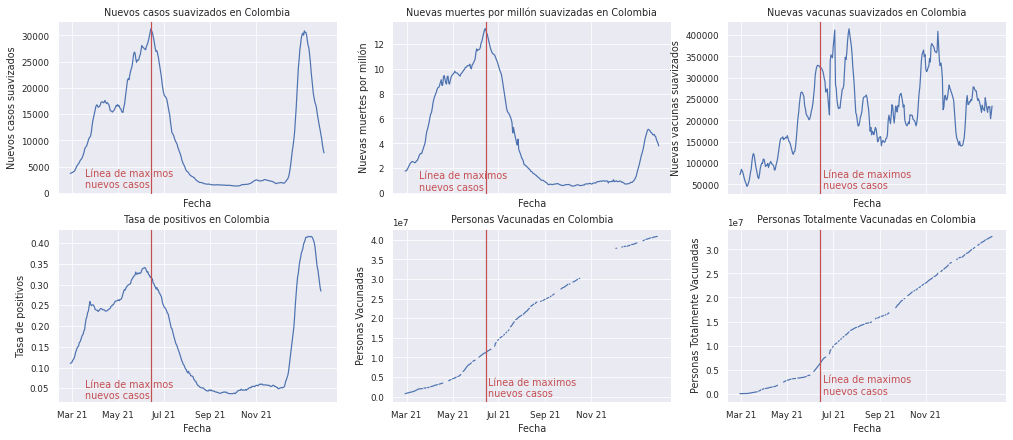

In [14]:
sns.set()
sns.set_context("paper")

fig, ax= plt.subplots(2,3, figsize=(17, 7), sharex=True)

ax[0,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_cases_smoothed'])

ax[0,0].set_title('Nuevos casos suavizados en Colombia')
ax[0,0].set_ylabel('Nuevos casos suavizados')
ax[0,0].set_xlabel('Fecha')

ax[0,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_deaths_smoothed_per_million'])

ax[0,1].set_title('Nuevas muertes por millón suavizadas en Colombia')
ax[0,1].set_ylabel('Nuevas muertes por millón')
ax[0,1].set_xlabel('Fecha')

ax[0,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_vaccinations_smoothed'])

ax[0,2].set_title('Nuevas vacunas suavizados en Colombia')
ax[0,2].set_ylabel('Nuevas vacunas suavizados')
ax[0,2].set_xlabel('Fecha')

ax[1,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['positive_rate'])

ax[1,0].set_title('Tasa de positivos en Colombia')
ax[1,0].set_ylabel('Tasa de positivos')
ax[1,0].set_xlabel('Fecha')

ax[1,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_vaccinated'])

ax[1,1].set_title('Personas Vacunadas en Colombia')
ax[1,1].set_ylabel('Personas Vacunadas')
ax[1,1].set_xlabel('Fecha')

ax[1,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_fully_vaccinated'])

ax[1,2].set_title('Personas Totalmente Vacunadas en Colombia')
ax[1,2].set_ylabel('Personas Totalmente Vacunadas')
ax[1,2].set_xlabel('Fecha')


FechaMaxNuevosContagios=BaseDatosCOLF['date'][np.argmax(BaseDatosCOLF['new_cases_smoothed'])]
ax[0,0].axvline(FechaMaxNuevosContagios, color='r')
ax[0,1].axvline(FechaMaxNuevosContagios, color='r')
ax[0,2].axvline(FechaMaxNuevosContagios, color='r')
ax[1,0].axvline(FechaMaxNuevosContagios, color='r')
ax[1,1].axvline(FechaMaxNuevosContagios, color='r')
ax[1,2].axvline(FechaMaxNuevosContagios, color='r')

plt.xticks(['2021-03-15','2021-05-15','2021-07-15','2021-09-15','2021-11-15'],['Mar 21','May 21','Jul 21','Sep 21','Nov 21'])
ax[0,0].text('2021-04-01', 1000, 'Línea de maximos\nnuevos casos', color = 'r')
ax[0,1].text('2021-04-01', 0.25, 'Línea de maximos\nnuevos casos', color = 'r')
ax[0,2].text('2021-07-01', 40000, 'Línea de maximos\nnuevos casos', color = 'r')
ax[1,0].text('2021-04-01', 0.025, 'Línea de maximos\nnuevos casos', color = 'r')
ax[1,1].text('2021-07-01', 0.5, 'Línea de maximos\nnuevos casos', color = 'r')
ax[1,2].text('2021-07-01', 0.5, 'Línea de maximos\nnuevos casos', color = 'r')

fig.show()

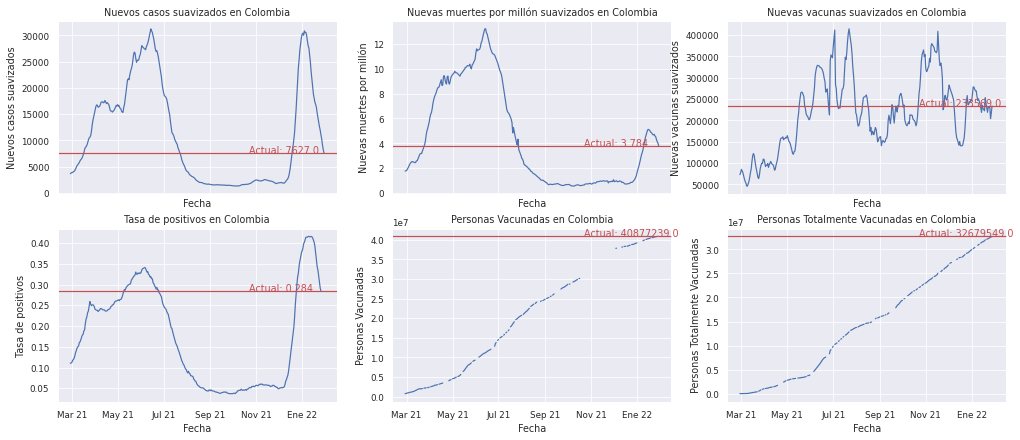

In [15]:
sns.set()
sns.set_context("paper")

fig, ax= plt.subplots(2,3, figsize=(17, 7), sharex=True)

ax[0,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_cases_smoothed'])

ax[0,0].set_title('Nuevos casos suavizados en Colombia')
ax[0,0].set_ylabel('Nuevos casos suavizados')
ax[0,0].set_xlabel('Fecha')

ax[0,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_deaths_smoothed_per_million'])

ax[0,1].set_title('Nuevas muertes por millón suavizados en Colombia')
ax[0,1].set_ylabel('Nuevas muertes por millón')
ax[0,1].set_xlabel('Fecha')

ax[0,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_vaccinations_smoothed'])

ax[0,2].set_title('Nuevas vacunas suavizados en Colombia')
ax[0,2].set_ylabel('Nuevas vacunas suavizados')
ax[0,2].set_xlabel('Fecha')

ax[1,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['positive_rate'])

ax[1,0].set_title('Tasa de positivos en Colombia')
ax[1,0].set_ylabel('Tasa de positivos')
ax[1,0].set_xlabel('Fecha')

ax[1,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_vaccinated'])

ax[1,1].set_title('Personas Vacunadas en Colombia')
ax[1,1].set_ylabel('Personas Vacunadas')
ax[1,1].set_xlabel('Fecha')

ax[1,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_fully_vaccinated'])

ax[1,2].set_title('Personas Totalmente Vacunadas en Colombia')
ax[1,2].set_ylabel('Personas Totalmente Vacunadas')
ax[1,2].set_xlabel('Fecha')

NewCasosActual=round(BaseDatosCOLF['new_cases_smoothed'][BaseDatosCOLF['new_cases_smoothed'].notna()].iloc[-1],0)
NewDeathActual=round(BaseDatosCOLF['new_deaths_smoothed_per_million'][BaseDatosCOLF['new_deaths_smoothed_per_million'].notna()].iloc[-1],3)
NewVacActual=round(BaseDatosCOLF['new_vaccinations_smoothed'][BaseDatosCOLF['new_vaccinations_smoothed'].notna()].iloc[-1],0)
TasaPosActual=round(BaseDatosCOLF['positive_rate'][BaseDatosCOLF['positive_rate'].notna()].iloc[-1],3)
PerVacActual=round(BaseDatosCOLF['people_vaccinated'][BaseDatosCOLF['people_vaccinated'].notna()].iloc[-1],0)
PerTotVacActual=round(BaseDatosCOLF['people_fully_vaccinated'][BaseDatosCOLF['people_fully_vaccinated'].notna()].iloc[-1],0)

ax[0,0].axhline(NewCasosActual, color='r')
ax[0,1].axhline(NewDeathActual, color='r')
ax[0,2].axhline(NewVacActual, color='r')
ax[1,0].axhline(TasaPosActual, color='r')
ax[1,1].axhline(PerVacActual, color='r')
ax[1,2].axhline(PerTotVacActual, color='r')

plt.xticks(['2021-03-15','2021-05-15','2021-07-15','2021-09-15','2021-11-15','2022-01-15'],['Mar 21','May 21','Jul 21','Sep 21','Nov 21','Ene 22'])

ax[0,0].text(BaseDatosCOLF['date'].iloc[-100], NewCasosActual, f'Actual: {NewCasosActual}', color = 'r')
ax[0,1].text(BaseDatosCOLF['date'].iloc[-100], NewDeathActual, f'Actual: {NewDeathActual}', color = 'r')
ax[0,2].text(BaseDatosCOLF['date'].iloc[-100], NewVacActual, f'Actual: {NewVacActual}', color = 'r')
ax[1,0].text(BaseDatosCOLF['date'].iloc[-100], TasaPosActual, f'Actual: {TasaPosActual}', color = 'r')
ax[1,1].text(BaseDatosCOLF['date'].iloc[-100], PerVacActual, f'Actual: {PerVacActual}', color = 'r')
ax[1,2].text(BaseDatosCOLF['date'].iloc[-100], PerTotVacActual, f'Actual: {PerTotVacActual}', color = 'r')

fig.show()

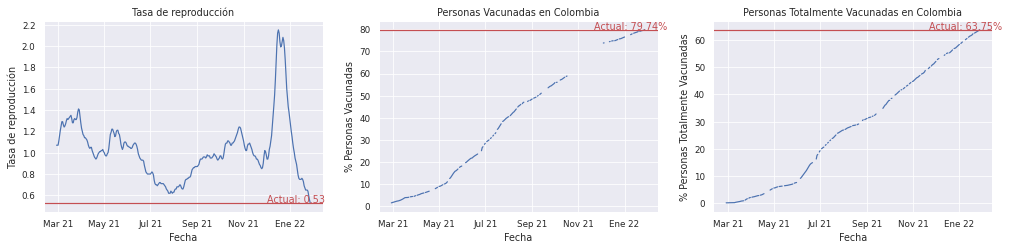

In [16]:
sns.set()
sns.set_context("paper")

fig, ax= plt.subplots(1,3, figsize=(17,3.5), sharex=True)

ax[0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['reproduction_rate'])

ax[0].set_title('Tasa de reproducción')
ax[0].set_ylabel('Tasa de reproducción')
ax[0].set_xlabel('Fecha')

ax[1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_vaccinated_per_hundred'])

ax[1].set_title('Personas Vacunadas en Colombia')
ax[1].set_ylabel('% Personas Vacunadas')
ax[1].set_xlabel('Fecha')

ax[2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_fully_vaccinated_per_hundred'])

ax[2].set_title('Personas Totalmente Vacunadas en Colombia')
ax[2].set_ylabel('% Personas Totalmente Vacunadas')
ax[2].set_xlabel('Fecha')

TasaRepActual=BaseDatosCOLF['reproduction_rate'][BaseDatosCOLF['reproduction_rate'].notna()].iloc[-1]
PerVacActual=BaseDatosCOLF['people_vaccinated_per_hundred'][BaseDatosCOLF['people_vaccinated_per_hundred'].notna()].iloc[-1]
PerTotalVacActual=BaseDatosCOLF['people_fully_vaccinated_per_hundred'][BaseDatosCOLF['people_fully_vaccinated_per_hundred'].notna()].iloc[-1]

ax[0].axhline(TasaRepActual, color='r')
ax[1].axhline(PerVacActual, color='r')
ax[2].axhline(PerTotalVacActual, color='r')

plt.xticks(['2021-03-15','2021-05-15','2021-07-15','2021-09-15','2021-11-15','2022-01-15'],['Mar 21','May 21','Jul 21','Sep 21','Nov 21','Ene 22'])
ax[0].text(BaseDatosCOLF['date'].iloc[-60], TasaRepActual, f'Actual: {TasaRepActual}', color = 'r')
ax[1].text(BaseDatosCOLF['date'].iloc[-70], PerVacActual, f'Actual: {PerVacActual}%', color = 'r')
ax[2].text(BaseDatosCOLF['date'].iloc[-70], PerTotalVacActual, f'Actual: {PerTotalVacActual}%', color = 'r')

fig.show()

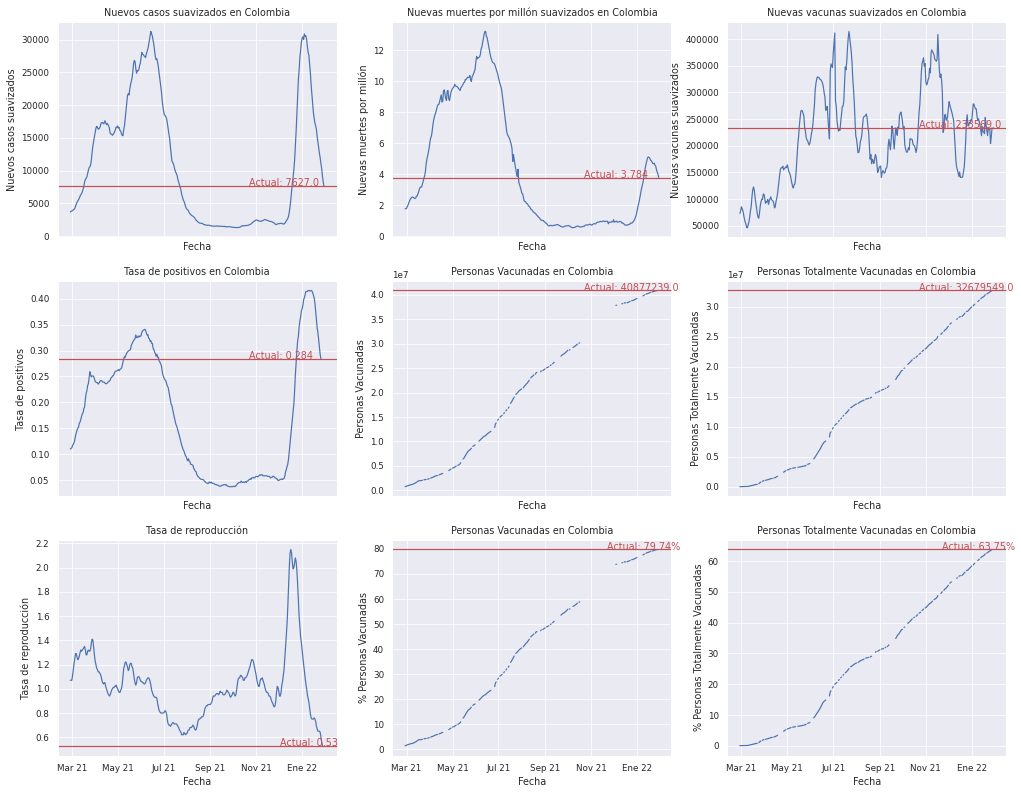

In [17]:
sns.set()
sns.set_context("paper")

fig, ax= plt.subplots(3,3, figsize=(17, 13.5), sharex=True)

ax[0,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_cases_smoothed'])

ax[0,0].set_title('Nuevos casos suavizados en Colombia')
ax[0,0].set_ylabel('Nuevos casos suavizados')
ax[0,0].set_xlabel('Fecha')

ax[0,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_deaths_smoothed_per_million'])

ax[0,1].set_title('Nuevas muertes por millón suavizados en Colombia')
ax[0,1].set_ylabel('Nuevas muertes por millón')
ax[0,1].set_xlabel('Fecha')

ax[0,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['new_vaccinations_smoothed'])

ax[0,2].set_title('Nuevas vacunas suavizados en Colombia')
ax[0,2].set_ylabel('Nuevas vacunas suavizados')
ax[0,2].set_xlabel('Fecha')

ax[1,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['positive_rate'])

ax[1,0].set_title('Tasa de positivos en Colombia')
ax[1,0].set_ylabel('Tasa de positivos')
ax[1,0].set_xlabel('Fecha')

ax[1,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_vaccinated'])

ax[1,1].set_title('Personas Vacunadas en Colombia')
ax[1,1].set_ylabel('Personas Vacunadas')
ax[1,1].set_xlabel('Fecha')

ax[1,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_fully_vaccinated'])

ax[1,2].set_title('Personas Totalmente Vacunadas en Colombia')
ax[1,2].set_ylabel('Personas Totalmente Vacunadas')
ax[1,2].set_xlabel('Fecha')

NewCasosActual=round(BaseDatosCOLF['new_cases_smoothed'][BaseDatosCOLF['new_cases_smoothed'].notna()].iloc[-1],0)
NewDeathActual=round(BaseDatosCOLF['new_deaths_smoothed_per_million'][BaseDatosCOLF['new_deaths_smoothed_per_million'].notna()].iloc[-1],3)
NewVacActual=round(BaseDatosCOLF['new_vaccinations_smoothed'][BaseDatosCOLF['new_vaccinations_smoothed'].notna()].iloc[-1],0)
TasaPosActual=round(BaseDatosCOLF['positive_rate'][BaseDatosCOLF['positive_rate'].notna()].iloc[-1],3)
PerVacActual=round(BaseDatosCOLF['people_vaccinated'][BaseDatosCOLF['people_vaccinated'].notna()].iloc[-1],0)
PerTotVacActual=round(BaseDatosCOLF['people_fully_vaccinated'][BaseDatosCOLF['people_fully_vaccinated'].notna()].iloc[-1],0)

ax[0,0].axhline(NewCasosActual, color='r')
ax[0,1].axhline(NewDeathActual, color='r')
ax[0,2].axhline(NewVacActual, color='r')
ax[1,0].axhline(TasaPosActual, color='r')
ax[1,1].axhline(PerVacActual, color='r')
ax[1,2].axhline(PerTotVacActual, color='r')

ax[0,0].text(BaseDatosCOLF['date'].iloc[-100], NewCasosActual, f'Actual: {NewCasosActual}', color = 'r')
ax[0,1].text(BaseDatosCOLF['date'].iloc[-100], NewDeathActual, f'Actual: {NewDeathActual}', color = 'r')
ax[0,2].text(BaseDatosCOLF['date'].iloc[-100], NewVacActual, f'Actual: {NewVacActual}', color = 'r')
ax[1,0].text(BaseDatosCOLF['date'].iloc[-100], TasaPosActual, f'Actual: {TasaPosActual}', color = 'r')
ax[1,1].text(BaseDatosCOLF['date'].iloc[-100], PerVacActual, f'Actual: {PerVacActual}', color = 'r')
ax[1,2].text(BaseDatosCOLF['date'].iloc[-100], PerTotVacActual, f'Actual: {PerTotVacActual}', color = 'r')

ax[2,0].plot(BaseDatosCOLF['date'],BaseDatosCOLF['reproduction_rate'])

ax[2,0].set_title('Tasa de reproducción')
ax[2,0].set_ylabel('Tasa de reproducción')
ax[2,0].set_xlabel('Fecha')

ax[2,1].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_vaccinated_per_hundred'])

ax[2,1].set_title('Personas Vacunadas en Colombia')
ax[2,1].set_ylabel('% Personas Vacunadas')
ax[2,1].set_xlabel('Fecha')

ax[2,2].plot(BaseDatosCOLF['date'],BaseDatosCOLF['people_fully_vaccinated_per_hundred'])

ax[2,2].set_title('Personas Totalmente Vacunadas en Colombia')
ax[2,2].set_ylabel('% Personas Totalmente Vacunadas')
ax[2,2].set_xlabel('Fecha')

TasaRepActual=BaseDatosCOLF['reproduction_rate'][BaseDatosCOLF['reproduction_rate'].notna()].iloc[-1]
PerVacActual=BaseDatosCOLF['people_vaccinated_per_hundred'][BaseDatosCOLF['people_vaccinated_per_hundred'].notna()].iloc[-1]
PerTotalVacActual=BaseDatosCOLF['people_fully_vaccinated_per_hundred'][BaseDatosCOLF['people_fully_vaccinated_per_hundred'].notna()].iloc[-1]

ax[2,0].axhline(TasaRepActual, color='r')
ax[2,1].axhline(PerVacActual, color='r')
ax[2,2].axhline(PerTotalVacActual, color='r')

plt.xticks(['2021-03-15','2021-05-15','2021-07-15','2021-09-15','2021-11-15','2022-01-15'],['Mar 21','May 21','Jul 21','Sep 21','Nov 21','Ene 22'])
ax[2,0].text(BaseDatosCOLF['date'].iloc[-60], TasaRepActual, f'Actual: {TasaRepActual}', color = 'r')
ax[2,1].text(BaseDatosCOLF['date'].iloc[-70], PerVacActual, f'Actual: {PerVacActual}%', color = 'r')
ax[2,2].text(BaseDatosCOLF['date'].iloc[-70], PerTotalVacActual, f'Actual: {PerTotalVacActual}%', color = 'r')

fig.show()

In [18]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min()) + 1

NewCases=BaseDatosCOLF['new_cases_smoothed']

NewCases_minmax_norm = minmax_norm(NewCases)

NewDeaths=BaseDatosCOLF['new_deaths_smoothed']

NewDeaths_minmax_norm = minmax_norm(NewDeaths)

PropNewDeathsNewCases =  BaseDatosCOLF['new_deaths_smoothed']/BaseDatosCOLF['new_cases_smoothed']       #NewDeaths_minmax_norm/NewCases_minmax_norm

#PropNewDeathsNewCases[215:222]=np.nan

Fechas=BaseDatosCOLF['date']

In [19]:
def MAPE(df_inputReal,df_inputTeorical):
  return abs(df_inputReal-df_inputTeorical)/df_inputTeorical*100

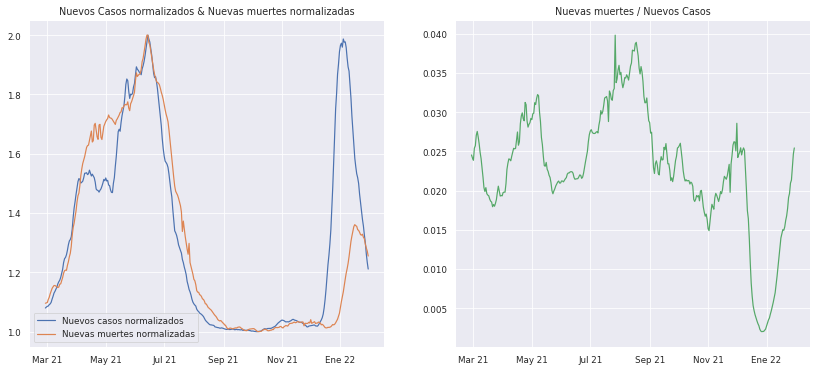

In [20]:
sns.set()
sns.set_context("paper")
fig, ax= plt.subplots(1,2, sharex=True, figsize=(14,6))
ax[0].set_title('Nuevos Casos normalizados & Nuevas muertes normalizadas')
ax[0].plot(Fechas,NewCases_minmax_norm,label='Nuevos casos normalizados')
ax[0].plot(Fechas,NewDeaths_minmax_norm,label='Nuevas muertes normalizadas')
ax[0].legend()

ax[1].set_title('Nuevas muertes / Nuevos Casos')
ax[1].plot(Fechas,PropNewDeathsNewCases, color='g')

plt.xticks(['2021-03-15','2021-05-15','2021-07-15','2021-09-15','2021-11-15','2022-01-15'],['Mar 21','May 21','Jul 21','Sep 21','Nov 21','Ene 22'])

fig.show()

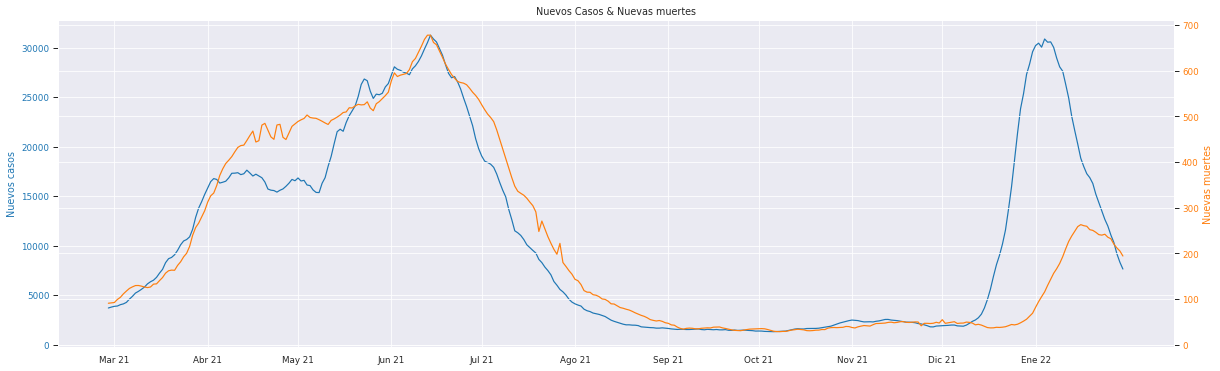

In [21]:
sns.set()
sns.set_context("paper")
fig, ax1= plt.subplots(sharex=True, figsize=(20,6))

ax1.set_title('Nuevos Casos & Nuevas muertes')

color = 'tab:blue'
ax1.set_ylabel('Nuevos casos',color=color)
ax1.tick_params(axis ='y', labelcolor = color)  

ax1.plot(Fechas,BaseDatosCOLF['new_cases_smoothed'],color=color)

ax2=ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Nuevas muertes',color=color)
ax2.tick_params(axis ='y', labelcolor = color)

ax2.plot(Fechas,BaseDatosCOLF['new_deaths_smoothed'], color=color)

plt.xticks(['2021-03-15','2021-04-15','2021-05-15','2021-06-15','2021-07-15','2021-08-15','2021-09-15','2021-10-15','2021-11-15','2021-12-15','2022-01-15'],['Mar 21','Abr 21','May 21','Jun 21','Jul 21','Ago 21','Sep 21','Oct 21','Nov 21','Dic 21','Ene 22'])

fig.show()

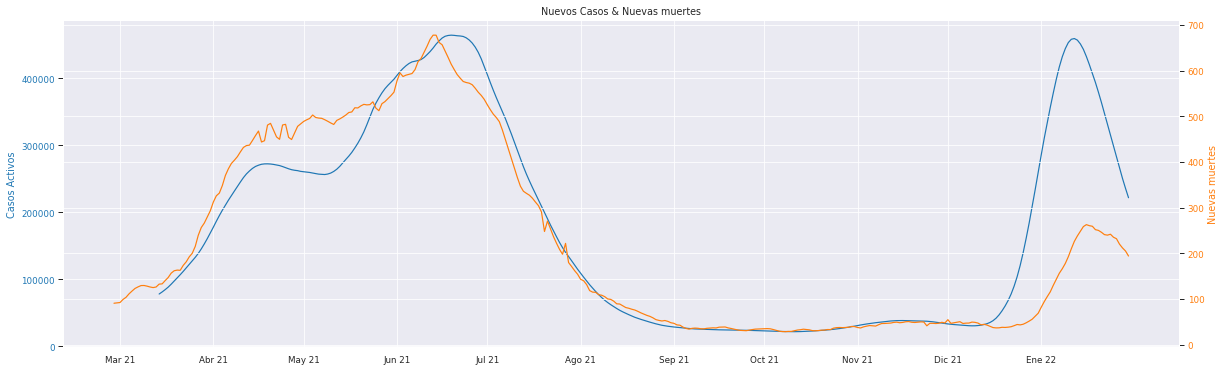

In [22]:
CasosActivos=np.zeros_like(BaseDatosCOLF['new_cases_smoothed'])

for i in range(0,len(CasosActivos)):
  if i < 15:
    CasosActivos[i]=np.nan
  else:
    CasosActivos[i]=BaseDatosCOLF['new_cases_smoothed'][i-15:i+1].sum()

sns.set()
sns.set_context("paper")
fig, ax1= plt.subplots(sharex=True, figsize=(20,6))

ax1.set_title('Nuevos Casos & Nuevas muertes')

color = 'tab:blue'
ax1.set_ylabel('Casos Activos',color=color)
ax1.tick_params(axis ='y', labelcolor = color)  

ax1.plot(Fechas,CasosActivos,color=color)

ax2=ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Nuevas muertes',color=color)
ax2.tick_params(axis ='y', labelcolor = color)

ax2.plot(Fechas,BaseDatosCOLF['new_deaths_smoothed'], color=color)

plt.xticks(['2021-03-15','2021-04-15','2021-05-15','2021-06-15','2021-07-15','2021-08-15','2021-09-15','2021-10-15','2021-11-15','2021-12-15','2022-01-15'],['Mar 21','Abr 21','May 21','Jun 21','Jul 21','Ago 21','Sep 21','Oct 21','Nov 21','Dic 21','Ene 22'])

fig.show()

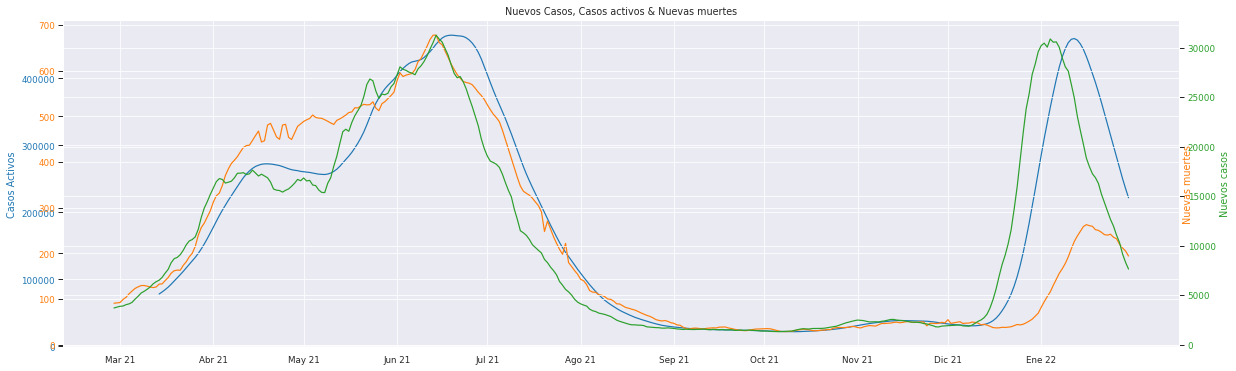

In [23]:
sns.set()
sns.set_context("paper")
fig, ax1= plt.subplots(sharex=True, figsize=(20,6))

ax1.set_title('Nuevos Casos, Casos activos & Nuevas muertes')

color = 'tab:blue'
ax1.set_ylabel('Casos Activos',color=color)
ax1.tick_params(axis ='y', labelcolor = color)  

ax1.plot(Fechas,CasosActivos,color=color)

ax2=ax1.twinx()
ax3=ax2.twinx()

color = 'tab:orange'
ax2.set_ylabel('Nuevas muertes',color=color)
ax2.tick_params(axis ='y', labelcolor = color)

ax2.plot(Fechas,BaseDatosCOLF['new_deaths_smoothed'], color=color)

color = 'tab:green'
ax3.set_ylabel('Nuevos casos',color=color)
ax3.tick_params(axis ='y', labelcolor = color)

ax3.plot(Fechas,BaseDatosCOLF['new_cases_smoothed'], color=color)

plt.xticks(['2021-03-15','2021-04-15','2021-05-15','2021-06-15','2021-07-15','2021-08-15','2021-09-15','2021-10-15','2021-11-15','2021-12-15','2022-01-15'],['Mar 21','Abr 21','May 21','Jun 21','Jul 21','Ago 21','Sep 21','Oct 21','Nov 21','Dic 21','Ene 22'])

fig.show()

In [24]:
CasosActivos_minmax_norm = minmax_norm(CasosActivos[15:])
errorNewCases=MAPE(NewDeaths_minmax_norm,NewCases_minmax_norm[:])
errorActiveCases=MAPE(NewDeaths_minmax_norm[15:],CasosActivos_minmax_norm)

In [25]:
Errores=pd.concat([errorNewCases.describe(),errorActiveCases.describe()], axis=1)
Errores.columns=['% Error with New Cases', '% Error with Active Cases']
Errores

,% Error with New Cases,% Error with Active Cases
count,338.000000,323.000000
mean,6.581527,5.842265
std,9.628172,8.734543
min,0.000000,0.013010
25%,0.833330,0.639125
50%,2.794211,1.974898
75%,8.936002,6.802000
max,45.356869,37.095476


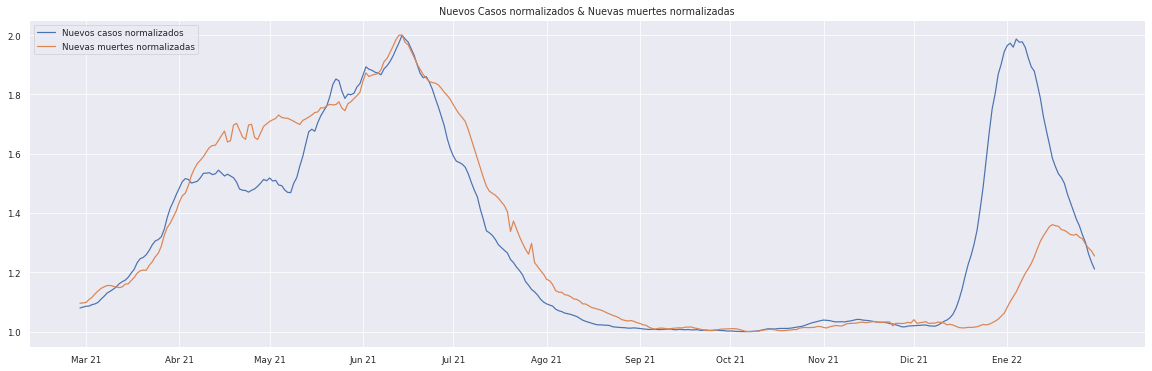

In [26]:
sns.set()
sns.set_context("paper")
fig, ax1= plt.subplots(figsize=(20,6))
ax1.set_title('Nuevos Casos normalizados & Nuevas muertes normalizadas')
ax1.plot(Fechas,NewCases_minmax_norm,label='Nuevos casos normalizados')
ax1.plot(Fechas,NewDeaths_minmax_norm,label='Nuevas muertes normalizadas')
ax1.legend()

plt.xticks(['2021-03-15','2021-04-15','2021-05-15','2021-06-15','2021-07-15','2021-08-15','2021-09-15','2021-10-15','2021-11-15','2021-12-15','2022-01-15'],['Mar 21','Abr 21','May 21','Jun 21','Jul 21','Ago 21','Sep 21','Oct 21','Nov 21','Dic 21','Ene 22'])

fig.show()

###Análisis República Dominicana###

In [ ]:
BaseDatosRepDom=BaseDatos.loc['DOM']
BaseDatosRepDom

In [ ]:
#BaseDatosRepDomF = A la información en Colombia desde que se inició la vacunación (13/03/2021)
BaseDatosRepDomF = BaseDatosRepDom.iloc[np.argmin(BaseDatosRepDom['people_vaccinated']):]
PorcentajeFaltantes=BaseDatosRepDomF.isnull().sum()/len(BaseDatosRepDomF)
PorcentajeFaltantes[PorcentajeFaltantes>0.5]

icu_patients                               1.000000
icu_patients_per_million                   1.000000
hosp_patients                              1.000000
hosp_patients_per_million                  1.000000
weekly_icu_admissions                      1.000000
weekly_icu_admissions_per_million          1.000000
weekly_hosp_admissions                     1.000000
weekly_hosp_admissions_per_million         1.000000
new_tests                                  0.883392
total_tests                                0.674912
total_tests_per_thousand                   0.674912
new_tests_per_thousand                     0.883392
total_boosters                             0.508834
total_boosters_per_hundred                 0.508834
excess_mortality_cumulative_absolute       1.000000
excess_mortality_cumulative                1.000000
excess_mortality                           1.000000
excess_mortality_cumulative_per_million    1.000000
dtype: float64

In [ ]:
BaseDatosRepDomF.set_axis(range(0,len(BaseDatosRepDomF)), axis=0, inplace=True)
BaseDatosRepDomF.drop(PorcentajeFaltantes.index[PorcentajeFaltantes>0.5],axis=1,inplace=True)
BaseDatosRepDomF.drop(['continent','location'],axis=1,inplace=True)
BaseDatosRepDomF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        283 non-null    object 
 1   total_cases                                 283 non-null    float64
 2   new_cases                                   283 non-null    float64
 3   new_cases_smoothed                          283 non-null    float64
 4   total_deaths                                283 non-null    float64
 5   new_deaths                                  283 non-null    float64
 6   new_deaths_smoothed                         283 non-null    float64
 7   total_cases_per_million                     283 non-null    float64
 8   new_cases_per_million                       283 non-null    float64
 9   new_cases_smoothed_per_million              283 non-null    float64
 10  total_deaths_p

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


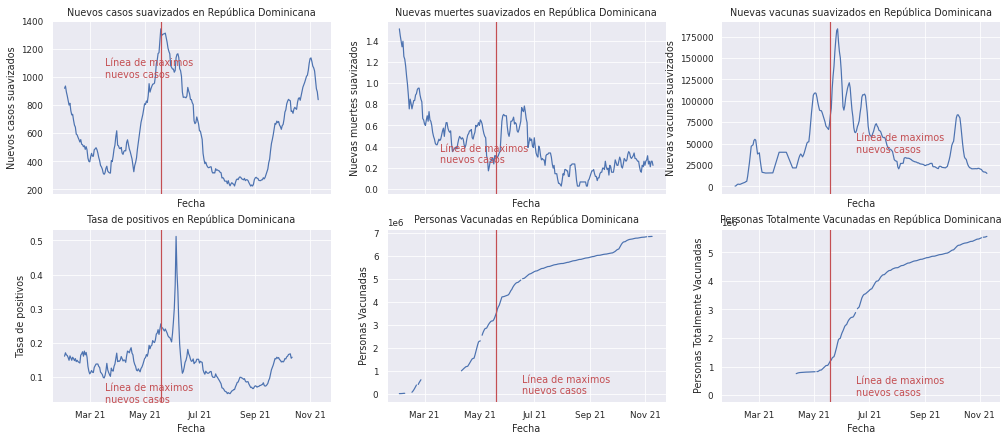

In [ ]:
sns.set()
sns.set_context("paper")

fig, ax= plt.subplots(2,3, figsize=(17, 7), sharex=True)

ax[0,0].plot(BaseDatosRepDomF['date'],BaseDatosRepDomF['new_cases_smoothed'])

ax[0,0].set_title('Nuevos casos suavizados en República Dominicana')
ax[0,0].set_ylabel('Nuevos casos suavizados')
ax[0,0].set_xlabel('Fecha')

ax[0,1].plot(BaseDatosRepDomF['date'],BaseDatosRepDomF['new_deaths_smoothed_per_million'])

ax[0,1].set_title('Nuevas muertes suavizados en República Dominicana')
ax[0,1].set_ylabel('Nuevas muertes suavizados')
ax[0,1].set_xlabel('Fecha')

ax[0,2].plot(BaseDatosRepDomF['date'],BaseDatosRepDomF['new_vaccinations_smoothed'])

ax[0,2].set_title('Nuevas vacunas suavizados en República Dominicana')
ax[0,2].set_ylabel('Nuevas vacunas suavizados')
ax[0,2].set_xlabel('Fecha')

ax[1,0].plot(BaseDatosRepDomF['date'],BaseDatosRepDomF['positive_rate'])

ax[1,0].set_title('Tasa de positivos en República Dominicana')
ax[1,0].set_ylabel('Tasa de positivos')
ax[1,0].set_xlabel('Fecha')

ax[1,1].plot(BaseDatosRepDomF['date'],BaseDatosRepDomF['people_vaccinated'])

ax[1,1].set_title('Personas Vacunadas en República Dominicana')
ax[1,1].set_ylabel('Personas Vacunadas')
ax[1,1].set_xlabel('Fecha')

ax[1,2].plot(BaseDatosRepDomF['date'],BaseDatosRepDomF['people_fully_vaccinated'])

ax[1,2].set_title('Personas Totalmente Vacunadas en República Dominicana')
ax[1,2].set_ylabel('Personas Totalmente Vacunadas')
ax[1,2].set_xlabel('Fecha')


FechaMaxNuevosContagios=BaseDatosRepDomF['date'][np.argmax(BaseDatosRepDomF['new_cases_smoothed'])]
ax[0,0].axvline(FechaMaxNuevosContagios, color='r')
ax[0,1].axvline(FechaMaxNuevosContagios, color='r')
ax[0,2].axvline(FechaMaxNuevosContagios, color='r')
ax[1,0].axvline(FechaMaxNuevosContagios, color='r')
ax[1,1].axvline(FechaMaxNuevosContagios, color='r')
ax[1,2].axvline(FechaMaxNuevosContagios, color='r')

plt.xticks(['2021-03-15','2021-05-15','2021-07-15','2021-09-15','2021-11-15'],['Mar 21','May 21','Jul 21','Sep 21','Nov 21'])
ax[0,0].text('2021-04-01', 1000, 'Línea de maximos\nnuevos casos', color = 'r')
ax[0,1].text('2021-04-01', 0.25, 'Línea de maximos\nnuevos casos', color = 'r')
ax[0,2].text('2021-07-01', 40000, 'Línea de maximos\nnuevos casos', color = 'r')
ax[1,0].text('2021-04-01', 0.025, 'Línea de maximos\nnuevos casos', color = 'r')
ax[1,1].text('2021-07-01', 0.5, 'Línea de maximos\nnuevos casos', color = 'r')
ax[1,2].text('2021-07-01', 0.5, 'Línea de maximos\nnuevos casos', color = 'r')

fig.show()